In [18]:
import os

#plot_save_path="C:\\Users\\e410675\\OneDrive - London South Bank University\\Desktop\\Plots"

plot_save_path = "/Users/e410675/Desktop/Plots"


#plot_save_path="C:\\Users\\Jose Luis\\Desktop"

In [19]:
import pandas as pd

# Replace with the path to the CSV file
df = pd.read_csv("Bed_Availability_and_Occupancy_2000-2025_combined_data_csv_format.csv")



In [20]:
df

,Date,Org_Code,Org_Name,Sector,Number_Of_Beds_available,Number_Of_Beds_occupied
0,30/06/2010,RCX,"The Queen Elizabeth Hospital, King's Lynn, NHS...",General & Acute,431.604396,337.868132
1,30/06/2010,RGQ,Ipswich Hospital NHS Trust,Maternity,44,22.879121
2,30/06/2010,RGR,West Suffolk NHS Foundation Trust,Maternity,47,15.164835
3,30/06/2010,RGT,Cambridge University Hospitals NHS Foundation ...,Maternity,42,26.494505
4,30/06/2010,RM1,Norfolk And Norwich University Hospitals NHS F...,Maternity,46.78022,26
...,...,...,...,...,...,...
56523,31/12/2023,RVR,Epsom And St Helier University Hospitals NHS T...,Mental Illness,0,0
56524,31/12/2023,RV3,Central And North West London NHS Foundation T...,Mental Illness,605.869565,558.826087
56525,31/12/2023,RRV,University College London Hospitals NHS Founda...,Mental Illness,10.228261,5.315217
56526,31/12/2023,RQY,South West London And St George's Mental Healt...,Mental Illness,344.51087,307.206522


# Data Analysis

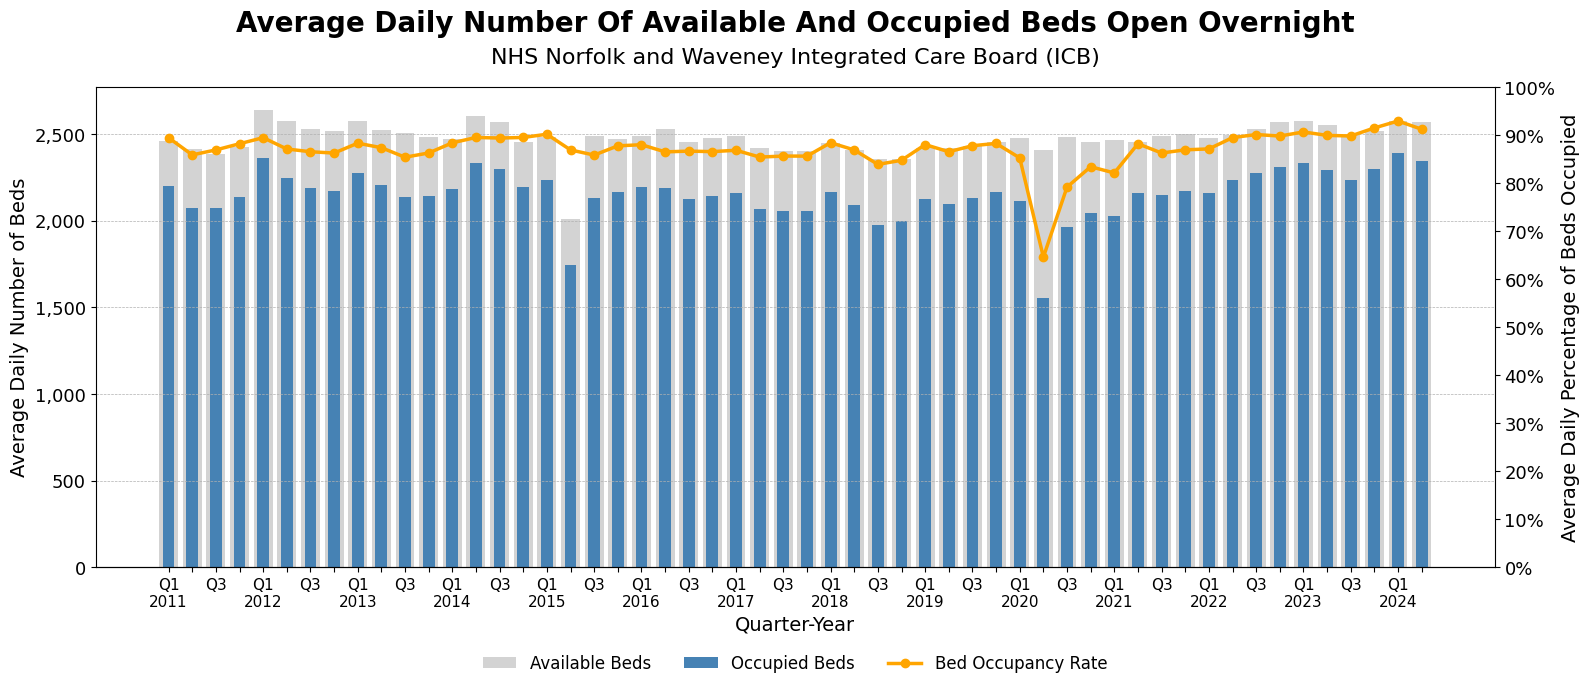

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

# === Create df_plot from df ===
df_plot = df.copy()

# === Clean and preprocess ===
df_plot['Date'] = pd.to_datetime(df_plot['Date'], dayfirst=True, errors='coerce')
df_plot['Number_Of_Beds_available'] = pd.to_numeric(df_plot['Number_Of_Beds_available'], errors='coerce')
df_plot['Number_Of_Beds_occupied'] = pd.to_numeric(df_plot['Number_Of_Beds_occupied'], errors='coerce')
df_plot['Quarter'] = df_plot['Date'].dt.to_period('Q')
df_plot['Sector'] = df_plot['Sector'].str.strip().str.title()

# === Select relevant trusts and sectors ===
selected_orgs = [
    "James Paget University Hospitals NHS Foundation Trust",
    "Norfolk And Norwich University Hospitals NHS Foundation Trust",
    "The Queen Elizabeth Hospital, King's Lynn, NHS Foundation Trust",
    "Norfolk And Suffolk NHS Foundation Trust",
    "Norfolk Community Health And Care NHS Trust"
]
selected_sectors = ['General & Acute', 'Maternity', 'Learning Disabilities', 'Mental Illness']

# === Filter data ===
df_filtered = df_plot[
    (df_plot['Org_Name'].isin(selected_orgs)) &
    (df_plot['Sector'].isin(selected_sectors)) &
    (df_plot['Quarter'] >= '2011Q1')
].copy()

# === Group and compute Occupied % ===
df_icb_grouped = df_filtered.groupby('Quarter')[['Number_Of_Beds_available', 'Number_Of_Beds_occupied']].sum()
df_icb_grouped['Occupied %'] = (df_icb_grouped['Number_Of_Beds_occupied'] / df_icb_grouped['Number_Of_Beds_available']) * 100

# === Format function for x-axis labels ===
def format_labels(quarters):
    return [f"Q{q.quarter}\n{q.year}" if q.quarter == 1 else ("Q3" if q.quarter == 3 else "") for q in quarters]

x_labels = format_labels(df_icb_grouped.index)

# === Plot ===
fig, ax1 = plt.subplots(figsize=(16, 8))
fig.patch.set_facecolor('white')

# Bars for available and occupied beds
bar1 = ax1.bar(df_icb_grouped.index.astype(str), df_icb_grouped['Number_Of_Beds_available'],
               label='Available Beds', color='lightgray', width=0.8)
bar2 = ax1.bar(df_icb_grouped.index.astype(str), df_icb_grouped['Number_Of_Beds_occupied'],
               label='Occupied Beds', color='steelblue', width=0.5)

# Configure left axis
ax1.set_ylabel("Average Daily Number of Beds", fontsize=14)
ax1.set_xlabel("Quarter-Year", fontsize=14)
ax1.set_xticks(range(len(x_labels)))
ax1.set_xticklabels(x_labels, rotation=0, ha='center', fontsize=12)
ax1.tick_params(axis='x', labelsize=11)
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
ax1.tick_params(axis='y', labelsize=13)
ax1.grid(axis='y', linestyle='--', linewidth=0.5)
ax1.grid(axis='x', visible=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

# Right axis for Occupied %
ax2 = ax1.twinx()
line, = ax2.plot(range(len(df_icb_grouped)), df_icb_grouped['Occupied %'].values,
                 marker='o', linestyle='-', linewidth=2.5, color='orange', label='Occupied %')
ax2.set_ylim(0, 100)
ax2.set_ylabel("Average Daily Percentage of Beds Occupied", fontsize=14)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x)}%"))
ax2.tick_params(axis='y', labelsize=13)

# Titles
ax1.set_title("Average Daily Number Of Available And Occupied Beds Open Overnight",
              fontsize=20, pad=40, weight='bold')
ax1.text(0.5, 1.05, "NHS Norfolk and Waveney Integrated Care Board (ICB)",
         fontsize=16, ha='center', transform=ax1.transAxes)

# Legend
handles = [bar1[0], bar2[0], line]
labels = ['Available Beds', 'Occupied Beds', 'Bed Occupancy Rate']
ax1.legend(handles, labels,
           loc='upper center',
           bbox_to_anchor=(0.5, -0.15),
           ncol=3,
           frameon=False,
           fontsize=12)

plt.tight_layout(rect=[0, 0.1, 1, 1])

plt.savefig(os.path.join(plot_save_path, f"A1_Avg Daily Number Of Available And Occupied Beds_ICB.png"), bbox_inches='tight', dpi=300)

plt.show()

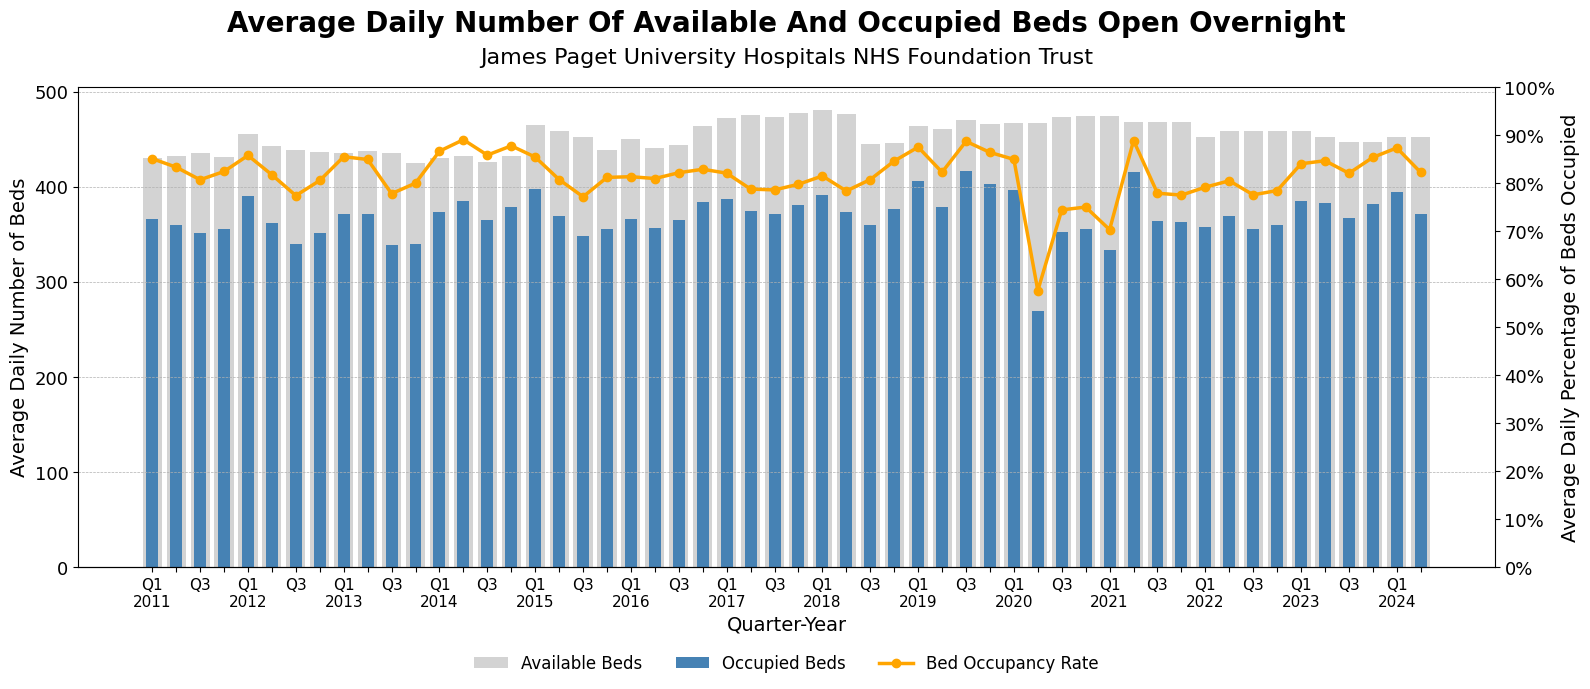

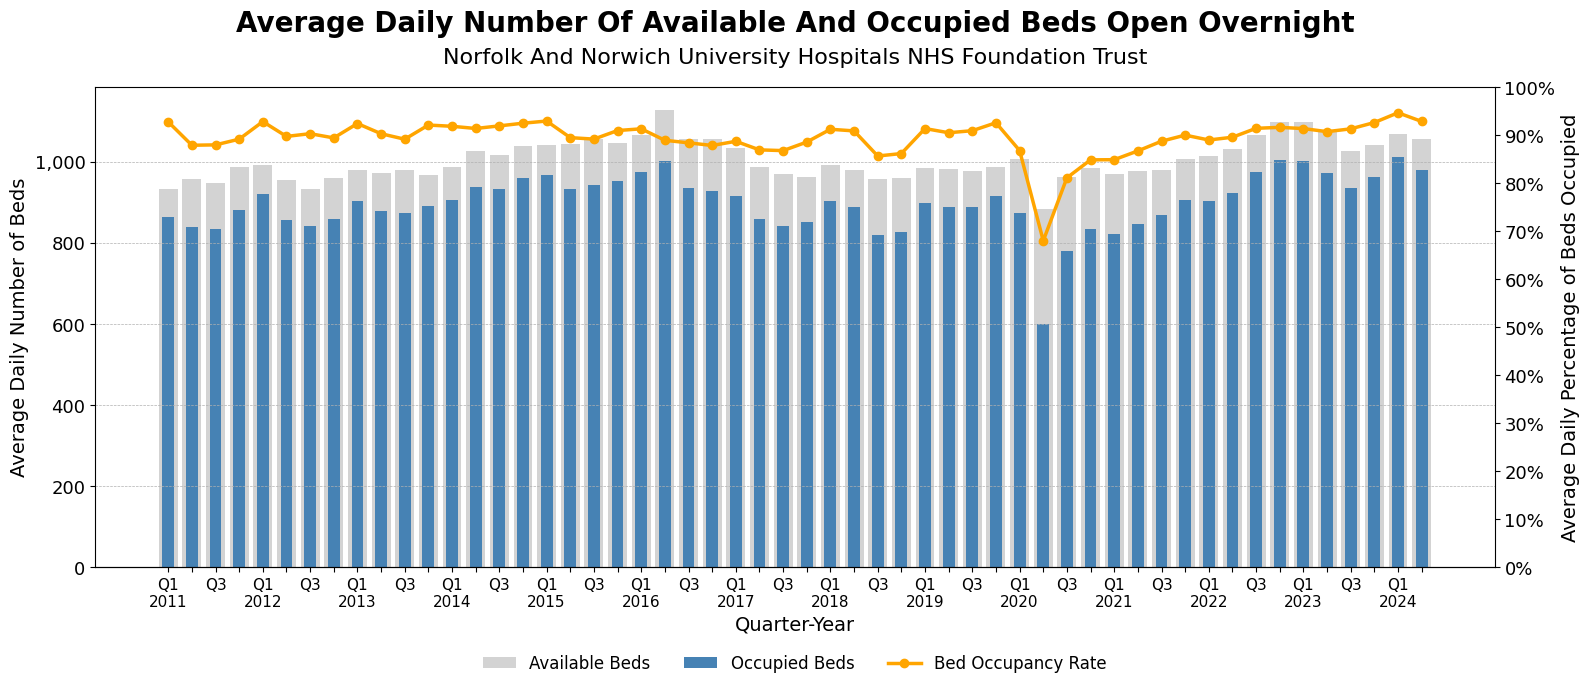

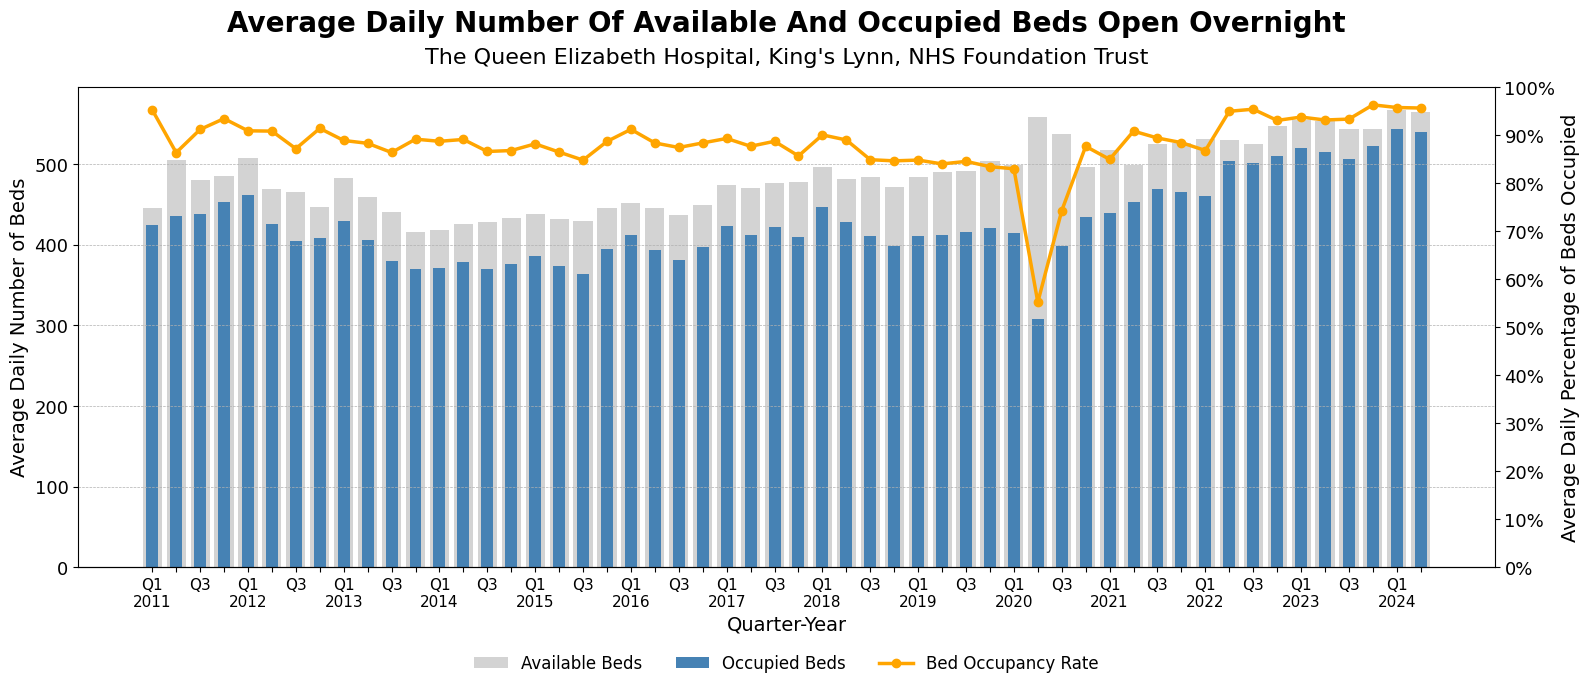

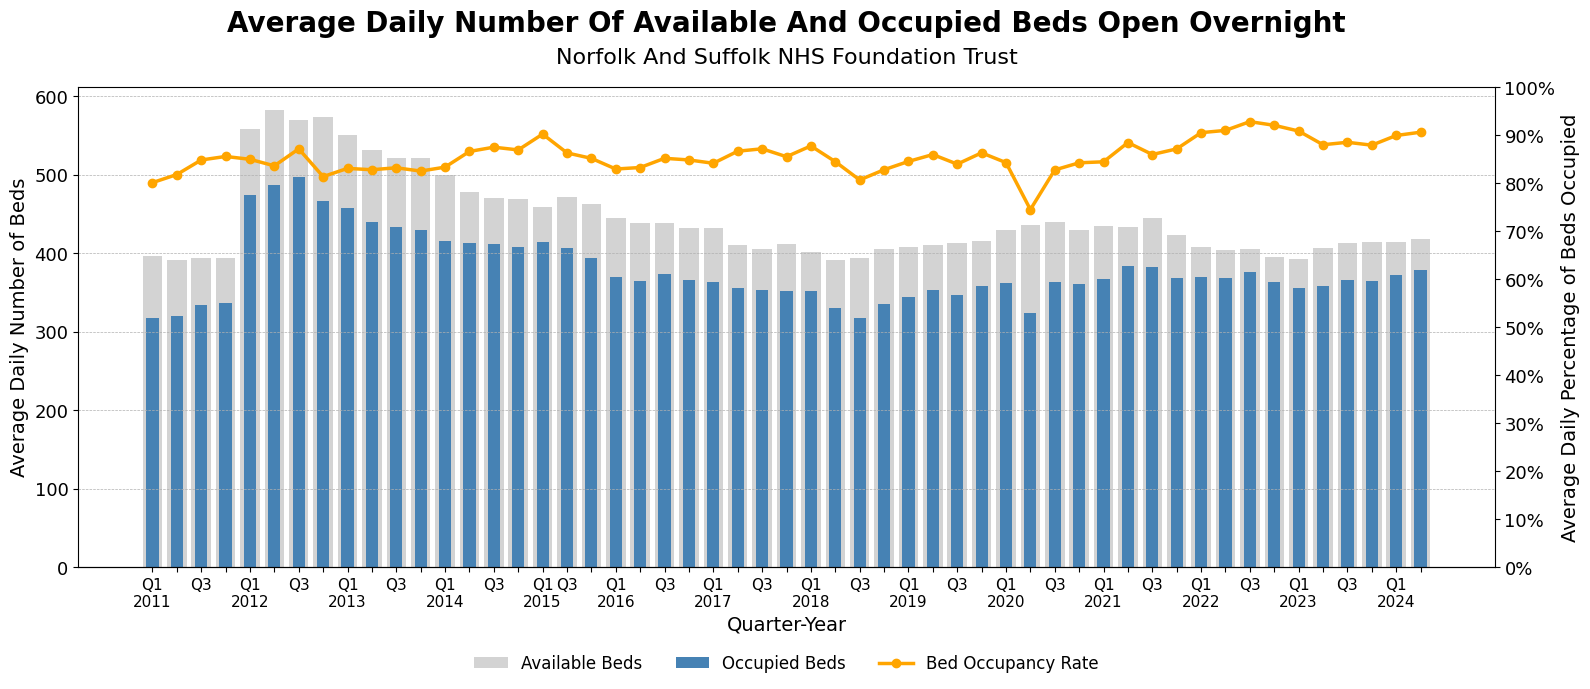

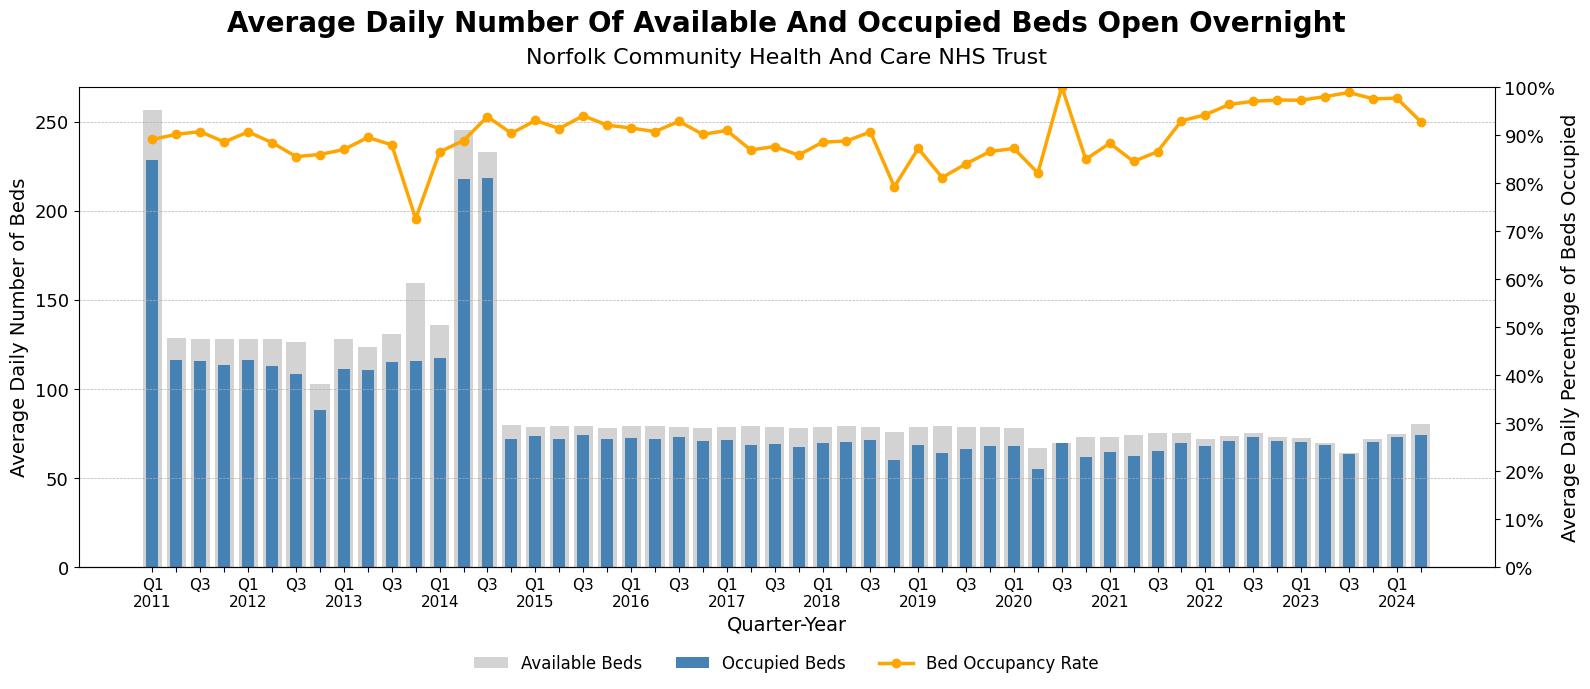

In [24]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# === Load and preprocess data ===
df_plot = df.copy()
df_plot['Date'] = pd.to_datetime(df_plot['Date'], dayfirst=True)
df_plot['Number_Of_Beds_available'] = pd.to_numeric(df_plot['Number_Of_Beds_available'], errors='coerce')
df_plot['Number_Of_Beds_occupied'] = pd.to_numeric(df_plot['Number_Of_Beds_occupied'], errors='coerce')
df_plot['Quarter'] = df_plot['Date'].dt.to_period('Q')

# === Select trusts ===
selected_orgs = [
    "James Paget University Hospitals NHS Foundation Trust",
    "Norfolk And Norwich University Hospitals NHS Foundation Trust",
    "The Queen Elizabeth Hospital, King's Lynn, NHS Foundation Trust",
    "Norfolk And Suffolk NHS Foundation Trust",
    "Norfolk Community Health And Care NHS Trust"
]

# === Filter relevant data ===
selected_sectors = ['General & Acute', 'Maternity', 'Learning Disabilities', 'Mental Illness']
df_filtered = df_plot[
    (df_plot['Org_Name'].isin(selected_orgs)) &
    (df_plot['Sector'].isin(selected_sectors)) &
    (df_plot['Quarter'] >= '2011Q1')
].copy()

# === Format function for x-axis ===
def format_labels(quarters):
    return [f"Q{q.quarter}\n{q.year}" if q.quarter == 1 else ("Q3" if q.quarter == 3 else "") for q in quarters]

# === Plotting loop ===
for org in selected_orgs:
    df_org = df_filtered[df_filtered['Org_Name'] == org]
    df_grouped = df_org.groupby('Quarter')[['Number_Of_Beds_available', 'Number_Of_Beds_occupied']].sum()
    df_grouped['Occupied %'] = (df_grouped['Number_Of_Beds_occupied'] / df_grouped['Number_Of_Beds_available']) * 100
    x_labels = format_labels(df_grouped.index)

    fig, ax1 = plt.subplots(figsize=(16, 8))
    fig.patch.set_facecolor('white')

    # Plot available and occupied beds as bars
    bar1 = ax1.bar(df_grouped.index.astype(str), df_grouped['Number_Of_Beds_available'],
                   label='Available Beds', color='lightgray', width=0.8)
    bar2 = ax1.bar(df_grouped.index.astype(str), df_grouped['Number_Of_Beds_occupied'],
                   label='Occupied Beds', color='steelblue', width=0.5)

    # Configure left axis
    ax1.set_ylabel("Average Daily Number of Beds", fontsize=14)
    ax1.set_xlabel("Quarter-Year", fontsize=14)
    ax1.set_xticks(range(len(x_labels)))
    ax1.set_xticklabels(x_labels, rotation=0, ha='center', fontsize=12)
    ax1.tick_params(axis='x', labelsize=11)
    ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
    ax1.tick_params(axis='y', labelsize=13)
    ax1.grid(axis='y', linestyle='--', linewidth=0.5)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['left'].set_visible(False)

    # Add occupied % line on right axis
    ax2 = ax1.twinx()
    line, = ax2.plot(range(len(df_grouped)), df_grouped['Occupied %'].values,
                     marker='o', linestyle='-', linewidth=2.5, color='orange', label='Occupied %')
    ax2.set_ylim(0, 100)
    ax2.set_ylabel("Average Daily Percentage of Beds Occupied", fontsize=14)  # Add label here
    ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))
    ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x)}%"))
    ax2.tick_params(axis='y', labelsize=13)

    # Add title and subtitle
    ax1.set_title("Average Daily Number Of Available And Occupied Beds Open Overnight", fontsize=20, pad=40, weight='bold')
    
    
    
    ax1.text(0.5, 1.05, f"{org}", fontsize=16, ha='center', transform=ax1.transAxes)

    # Combine legend
    handles = [bar1[0], bar2[0], line]
    labels = ['Available Beds', 'Occupied Beds', 'Bed Occupancy Rate']
    ax1.legend(handles, labels,
               loc='upper center',
               bbox_to_anchor=(0.5, -0.15),
               ncol=3,
               frameon=False,
               fontsize=12)

    plt.tight_layout(rect=[0, 0.1, 1, 1])
    
    plt.savefig(os.path.join(plot_save_path, f"A1_Avg Daily Number Of Available And Occupied Beds {org}.png"), bbox_inches='tight', dpi=300)
    
    
    plt.show()

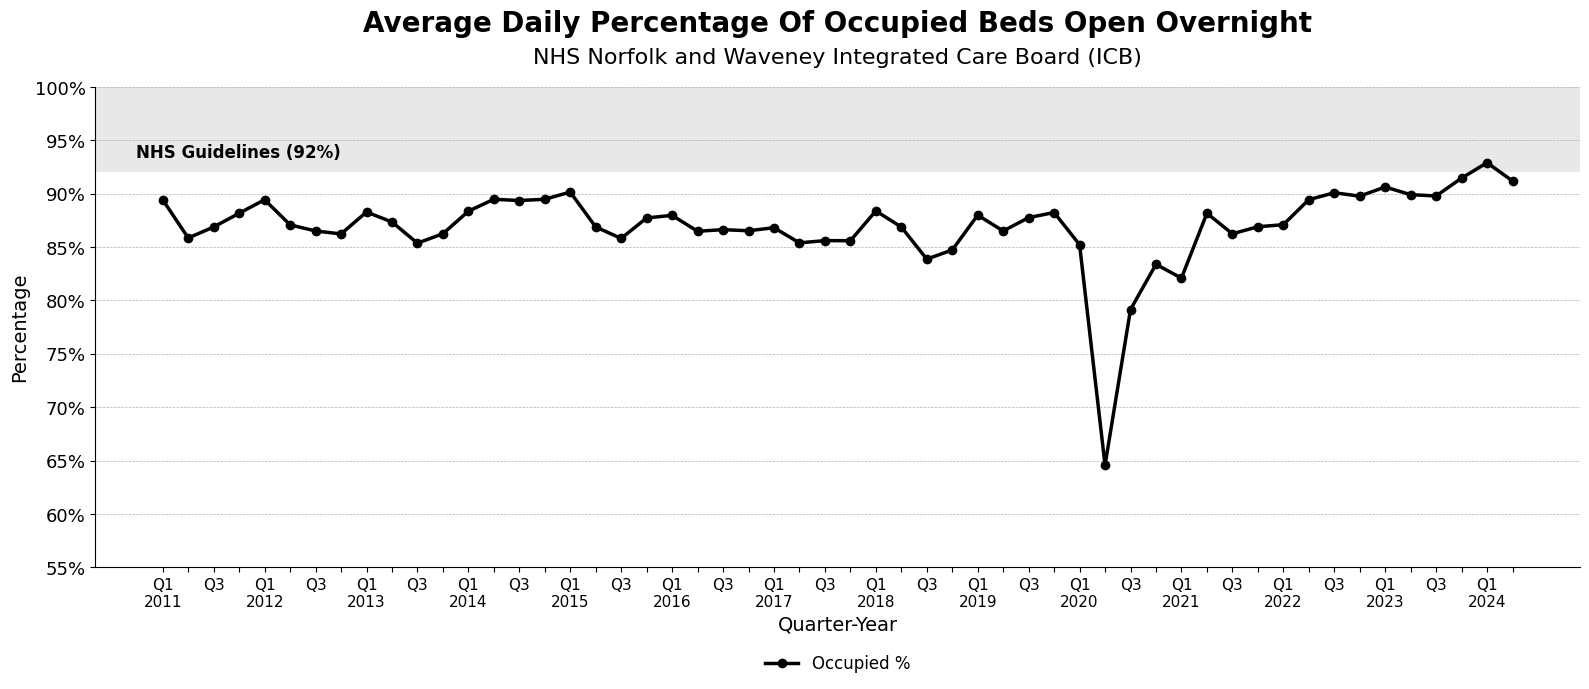

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

# === Create df_plot from df ===
df_plot = df.copy()

# === Clean and preprocess ===
df_plot['Date'] = pd.to_datetime(df_plot['Date'], dayfirst=True, errors='coerce')
df_plot['Number_Of_Beds_available'] = pd.to_numeric(df_plot['Number_Of_Beds_available'], errors='coerce')
df_plot['Number_Of_Beds_occupied'] = pd.to_numeric(df_plot['Number_Of_Beds_occupied'], errors='coerce')
df_plot['Quarter'] = df_plot['Date'].dt.to_period('Q')
df_plot['Sector'] = df_plot['Sector'].str.strip().str.title()

# === Select trusts and sectors ===
selected_orgs = [
    "James Paget University Hospitals NHS Foundation Trust",
    "Norfolk And Norwich University Hospitals NHS Foundation Trust",
    "The Queen Elizabeth Hospital, King's Lynn, NHS Foundation Trust",
    "Norfolk And Suffolk NHS Foundation Trust",
    "Norfolk Community Health And Care NHS Trust"
]
selected_sectors = ['General & Acute', 'Maternity', 'Learning Disabilities', 'Mental Illness']

# === Filter data ===
df_filtered = df_plot[
    (df_plot['Org_Name'].isin(selected_orgs)) &
    (df_plot['Sector'].isin(selected_sectors)) &
    (df_plot['Quarter'] >= '2011Q1')
].copy()

# === Group and compute occupied percentage across the entire ICB ===
df_icb_grouped = df_filtered.groupby('Quarter')[['Number_Of_Beds_available', 'Number_Of_Beds_occupied']].sum()
df_icb_grouped['Occupied %'] = (df_icb_grouped['Number_Of_Beds_occupied'] / df_icb_grouped['Number_Of_Beds_available']) * 100

# === Format x-axis labels (Q1 shows year, Q3 labeled, others blank) ===
def format_labels(quarters):
    return [f"Q{q.quarter}\n{q.year}" if q.quarter == 1 else ("Q3" if q.quarter == 3 else "") for q in quarters]

x_labels = format_labels(df_icb_grouped.index)

# === Y-axis limits ===
y_max = 100
y_min = max(0, ((df_icb_grouped['Occupied %'].min() // 5) * 5) - 5)

# === Plot ===
fig, ax = plt.subplots(figsize=(16, 8))
fig.patch.set_facecolor('white')

# Plot black line
ax.plot(
    range(len(df_icb_grouped)),
    df_icb_grouped['Occupied %'].values,
    marker='o', linestyle='-', linewidth=2.5, color='black'
)

# Highlight NHS guideline area above 92%
ax.axhspan(92, y_max, facecolor='lightgray', alpha=0.5)
ax.text(
    len(df_icb_grouped) - 47, 93, "NHS Guidelines (92%)",
    fontsize=12, color='black', ha='right', va='bottom', fontweight='bold'
)

# Titles and labels
ax.set_title("Average Daily Percentage Of Occupied Beds Open Overnight",
             fontsize=20, pad=40, weight='bold')
ax.text(0.5, 1.05, "NHS Norfolk and Waveney Integrated Care Board (ICB)",
        fontsize=16, ha='center', transform=ax.transAxes)
ax.set_ylabel("Percentage", fontsize=14)
ax.set_xlabel("Quarter-Year", fontsize=14)

# Axis ticks and labels
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=0, ha='center', fontsize=13)
ax.tick_params(axis='x', labelsize=11)
ax.set_ylim(y_min, y_max)
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x)}%"))
ax.tick_params(axis='y', labelsize=13)

# Grid: only horizontal
ax.grid(axis='y', linestyle='--', linewidth=0.5)
ax.grid(axis='x', visible=False)

# Remove spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)

# Legend
ax.legend(
    labels=["Occupied %"],
    title="",
    fontsize=12,
    title_fontsize=13,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=1,
    frameon=False
)

# Final layout
plt.tight_layout(rect=[0, 0.1, 1, 1])
plt.savefig(os.path.join(plot_save_path, f"A2_Avg_Daily_Perctg_Available_Beds_ICB.png"), bbox_inches='tight', dpi=300)
plt.show()


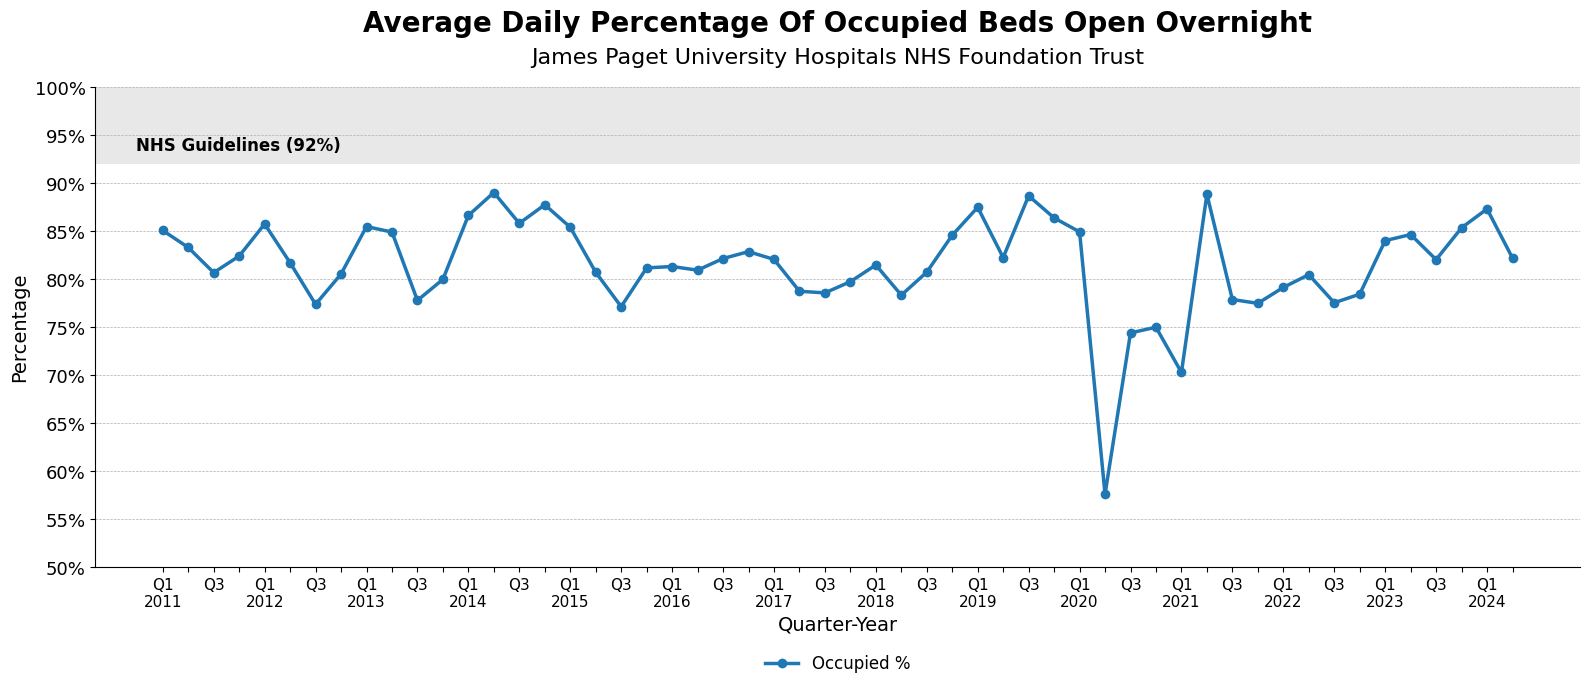

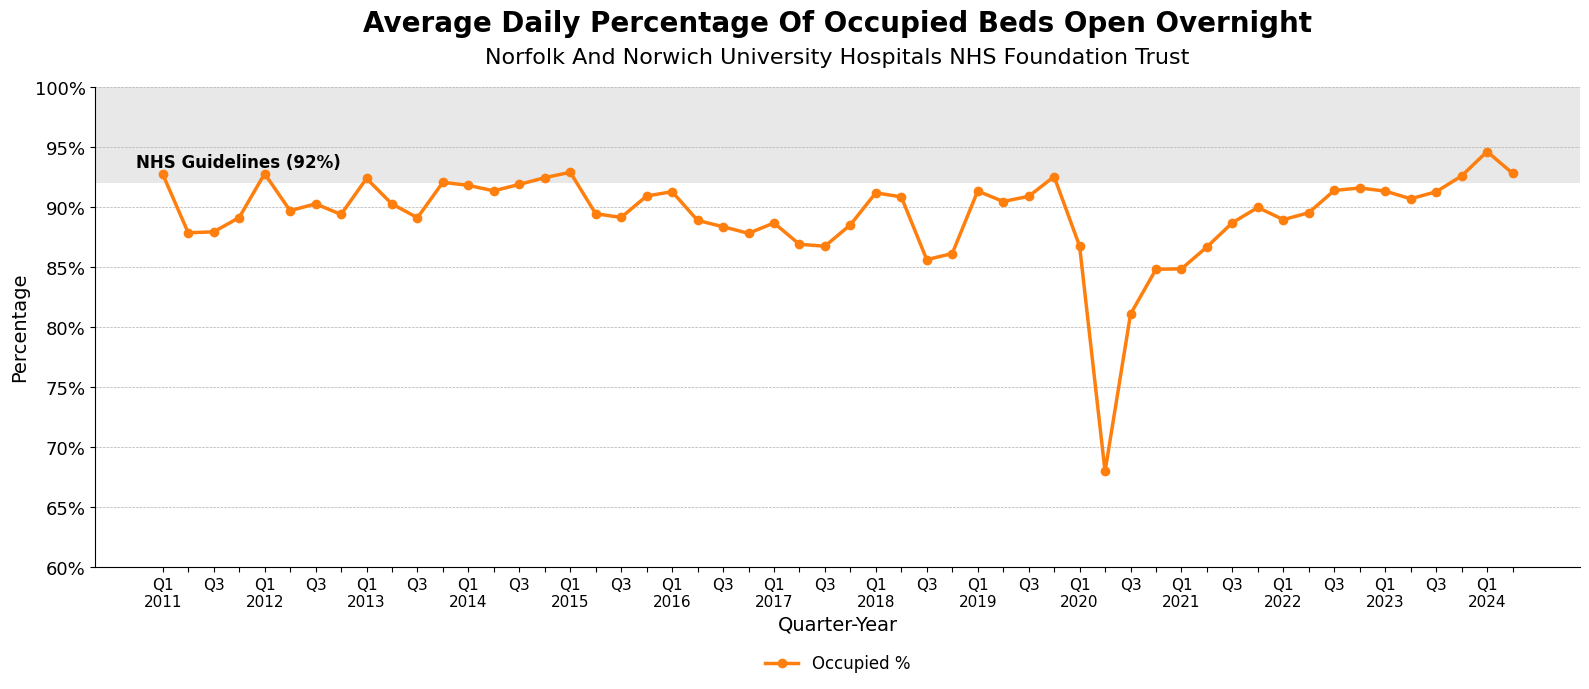

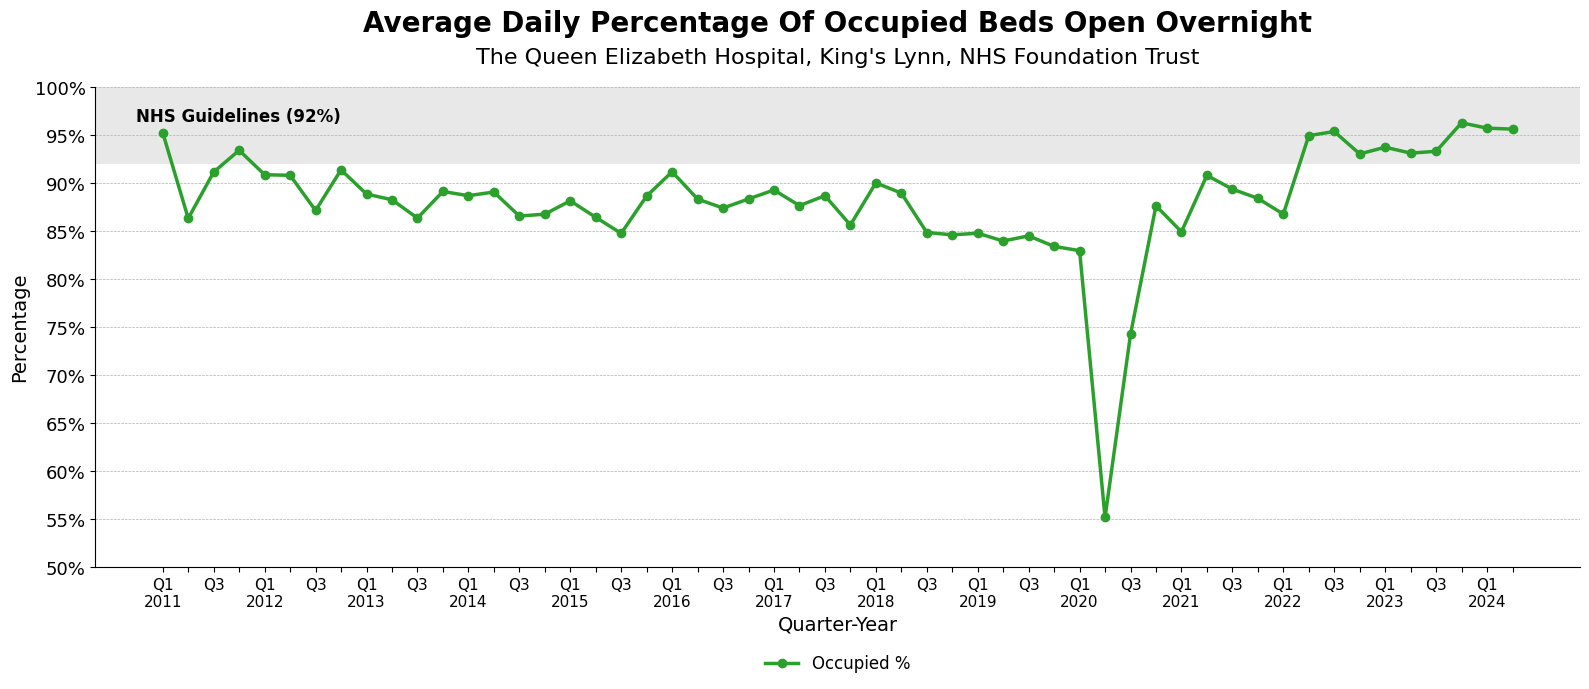

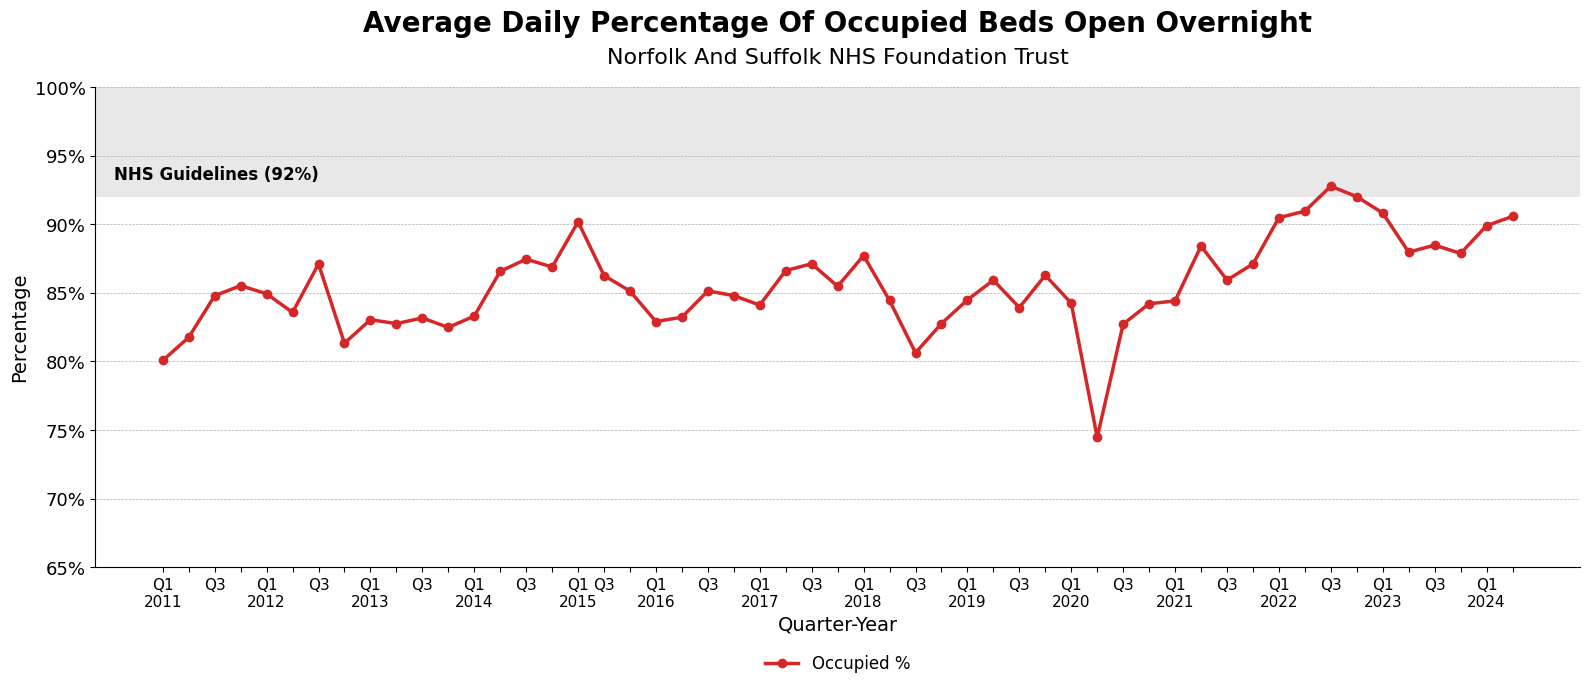

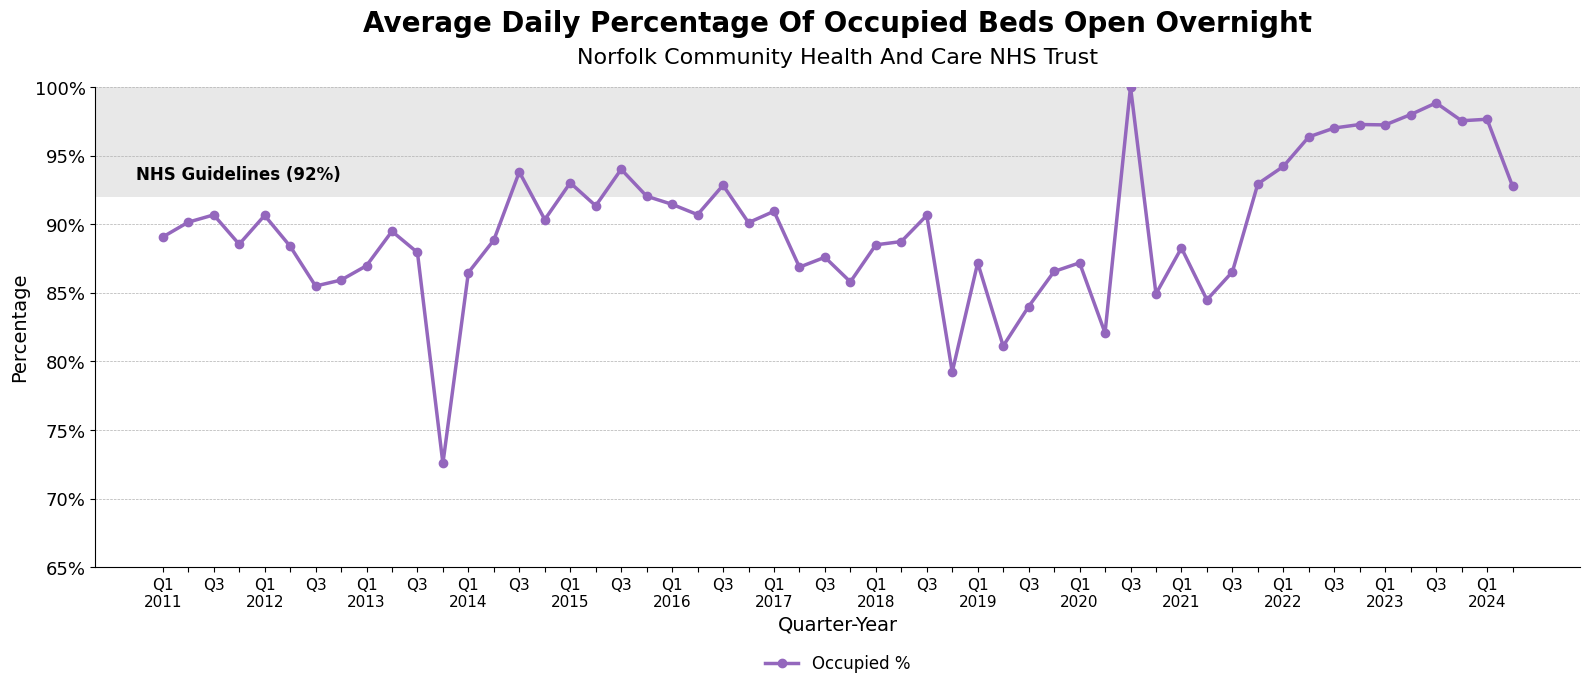

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

# === Create a copy for plotting ===
df_plot = df.copy()
df_plot['Date'] = pd.to_datetime(df_plot['Date'], dayfirst=True)
df_plot['Number_Of_Beds_available'] = pd.to_numeric(df_plot['Number_Of_Beds_available'], errors='coerce')
df_plot['Number_Of_Beds_occupied'] = pd.to_numeric(df_plot['Number_Of_Beds_occupied'], errors='coerce')
df_plot['Quarter'] = df_plot['Date'].dt.to_period('Q')

# === Select trusts ===
selected_orgs = [
    "James Paget University Hospitals NHS Foundation Trust",
    "Norfolk And Norwich University Hospitals NHS Foundation Trust",
    "The Queen Elizabeth Hospital, King's Lynn, NHS Foundation Trust",
    "Norfolk And Suffolk NHS Foundation Trust",
    "Norfolk Community Health And Care NHS Trust"
]

# === Include sectors ===
selected_sectors = ['General & Acute', 'Maternity', 'Learning Disabilities', 'Mental Illness']

# === Filter data ===
df_filtered = df_plot[
    (df_plot['Org_Name'].isin(selected_orgs)) &
    (df_plot['Sector'].isin(selected_sectors)) &
    (df_plot['Quarter'] >= '2011Q1')
].copy()

# === Group and compute % occupied ===
results = []
for org in selected_orgs:
    df_org = df_filtered[df_filtered['Org_Name'] == org]
    df_grouped = df_org.groupby('Quarter')[['Number_Of_Beds_available', 'Number_Of_Beds_occupied']].sum()
    df_grouped['Occupied %'] = (df_grouped['Number_Of_Beds_occupied'] / df_grouped['Number_Of_Beds_available']) * 100
    results.append((org, df_grouped['Occupied %']))

# === Label formatter ===
def format_labels(quarters):
    return [f"Q{q.quarter}\n{q.year}" if q.quarter == 1 else ("Q3" if q.quarter == 3 else "") for q in quarters]

# === Use Tab10 colors ===
colors = plt.get_cmap("tab10").colors

# === Plot ===
for idx, (org, occupied_series) in enumerate(results):
    x_labels = format_labels(occupied_series.index)

    y_max = 100
    y_min = max(0, ((occupied_series.min() // 5) * 5) - 5)

    fig, ax = plt.subplots(figsize=(16, 8))
    fig.patch.set_facecolor('white')

    ax.plot(range(len(occupied_series)), occupied_series.values,
            marker='o', linestyle='-', linewidth=2.5, color=colors[idx % 10])

    # === NHS Guidelines Highlight ===
    if org == "The Queen Elizabeth Hospital, King's Lynn, NHS Foundation Trust":
        ax.axhspan(92, y_max, facecolor='lightgray', alpha=0.5)
        ax.text(
            len(occupied_series) - 47, 96, "NHS Guidelines (92%)",
            fontsize=12, color='black', ha='right', va='bottom', fontweight='bold'
        )
    else:
        ax.axhspan(92, y_max, facecolor='lightgray', alpha=0.5)
        ax.text(
            len(occupied_series) - 47, 93, "NHS Guidelines (92%)",
            fontsize=12, color='black', ha='right', va='bottom', fontweight='bold'
        )

    ax.set_title("Average Daily Percentage Of Occupied Beds Open Overnight", fontsize=20, pad=40, weight='bold')
    ax.text(0.5, 1.05, f"{org}", fontsize=16, ha='center', transform=ax.transAxes)

    ax.set_ylabel("Percentage", fontsize=14)
    ax.set_xlabel("Quarter-Year", fontsize=14)

    ax.set_xticks(range(len(x_labels)))
    ax.set_xticklabels(x_labels, rotation=0, ha='center', fontsize=13)
    ax.tick_params(axis='x', labelsize=11)

    ax.set_ylim(y_min, y_max)
    ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x)}%"))
    ax.tick_params(axis='y', labelsize=13)

    ax.grid(axis='y', linestyle='--', linewidth=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(True)

    ax.legend(
        labels=["Occupied %"],
        title="",
        fontsize=12,
        title_fontsize=13,
        loc='upper center',
        bbox_to_anchor=(0.5, -0.15),
        ncol=1,
        frameon=False
    )

    plt.tight_layout(rect=[0, 0.1, 1, 1])
    plt.savefig(os.path.join(plot_save_path, f"A2_Avg_Daily_Perctg_Available_Beds_{org.replace(',', '').replace(' ', '_')}.png"), bbox_inches='tight', dpi=300)
    plt.show()


/var/folders/4_/wj3d4rr14vb32p3pr2705k9mjbk4dm/T/ipykernel_12979/3014281271.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  tab10 = get_cmap('tab10')


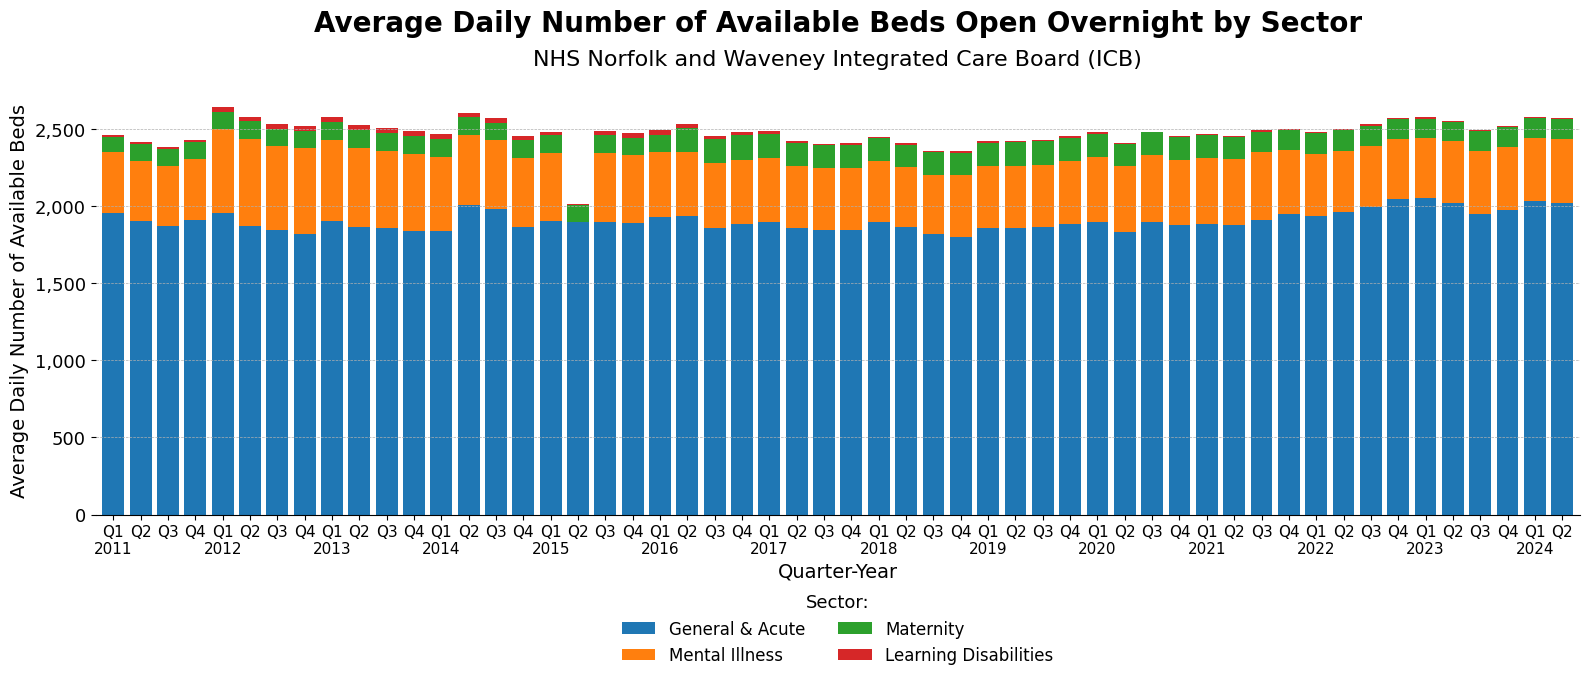

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.cm import get_cmap
import os

# === Create df_plot from df ===
df_plot = df.copy()

# === Clean and preprocess ===
df_plot['Date'] = pd.to_datetime(df_plot['Date'], dayfirst=True, errors='coerce')
df_plot['Number_Of_Beds_available'] = pd.to_numeric(df_plot['Number_Of_Beds_available'], errors='coerce')
df_plot['Quarter'] = df_plot['Date'].dt.to_period('Q')

# === Normalize sector names to unify duplicates like "mental illness" ===
df_plot['Sector'] = df_plot['Sector'].str.strip().str.title()

# === Filter for Norfolk & Waveney ICB organizations ===
norfolk_orgs = [
    "James Paget University Hospitals NHS Foundation Trust",
    "Norfolk And Norwich University Hospitals NHS Foundation Trust",
    "Norfolk And Suffolk NHS Foundation Trust",
    "Norfolk Community Health And Care NHS Trust",
    "The Queen Elizabeth Hospital, King's Lynn, NHS Foundation Trust"
]
df_icb = df_plot[df_plot['Org_Name'].isin(norfolk_orgs)].copy()

# === Group by Quarter and Sector ===
df_grouped = (
    df_icb.groupby(['Quarter', 'Sector'])['Number_Of_Beds_available']
    .sum()
    .unstack()
    .fillna(0)
)

# === Filter for Q1 2011 onwards ===
df_grouped = df_grouped[df_grouped.index >= '2011Q1']

# === Sort sectors by total sum (largest at bottom in stack) ===
sorted_sectors = df_grouped.sum(axis=0).sort_values(ascending=False).index.tolist()
df_grouped = df_grouped[sorted_sectors]

# === Define x-axis labels ===
def format_labels(quarters):
    return [f"Q{q.quarter}\n{q.year}" if q.quarter == 1 else f"Q{q.quarter}" for q in quarters]

x_labels = format_labels(df_grouped.index)

# === Apply Tab10 colors ===
tab10 = get_cmap('tab10')
colors = [tab10(i % 10) for i in range(len(sorted_sectors))]

# === Plot ===
fig, ax = plt.subplots(figsize=(16, 8))
fig.patch.set_facecolor('white')

df_grouped.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    width=0.8,
    color=colors
)

# === Titles and labels ===
ax.set_title("Average Daily Number of Available Beds Open Overnight by Sector",
             fontsize=20, pad=40, weight='bold')
ax.text(0.5, 1.05, "NHS Norfolk and Waveney Integrated Care Board (ICB)", fontsize=16, ha='center', transform=ax.transAxes)
ax.set_ylabel("Average Daily Number of Available Beds", fontsize=14)
ax.set_xlabel("Quarter-Year", fontsize=14)

# === Axis formatting ===
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=0, ha='center', fontsize=11)
ax.tick_params(axis='y', labelsize=13)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

# === Style and legend ===
ax.grid(axis='y', linestyle='--', linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.legend(
    title="Sector:",
    fontsize=12,
    title_fontsize=13,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=2,
    frameon=False
)

plt.tight_layout(rect=[0, 0.1, 1, 1])

# === Save plot ===
plt.savefig(os.path.join(plot_save_path, f"Avg Daily Number of Available Overnight Beds_ICB.png"), bbox_inches='tight', dpi=300)

plt.show()


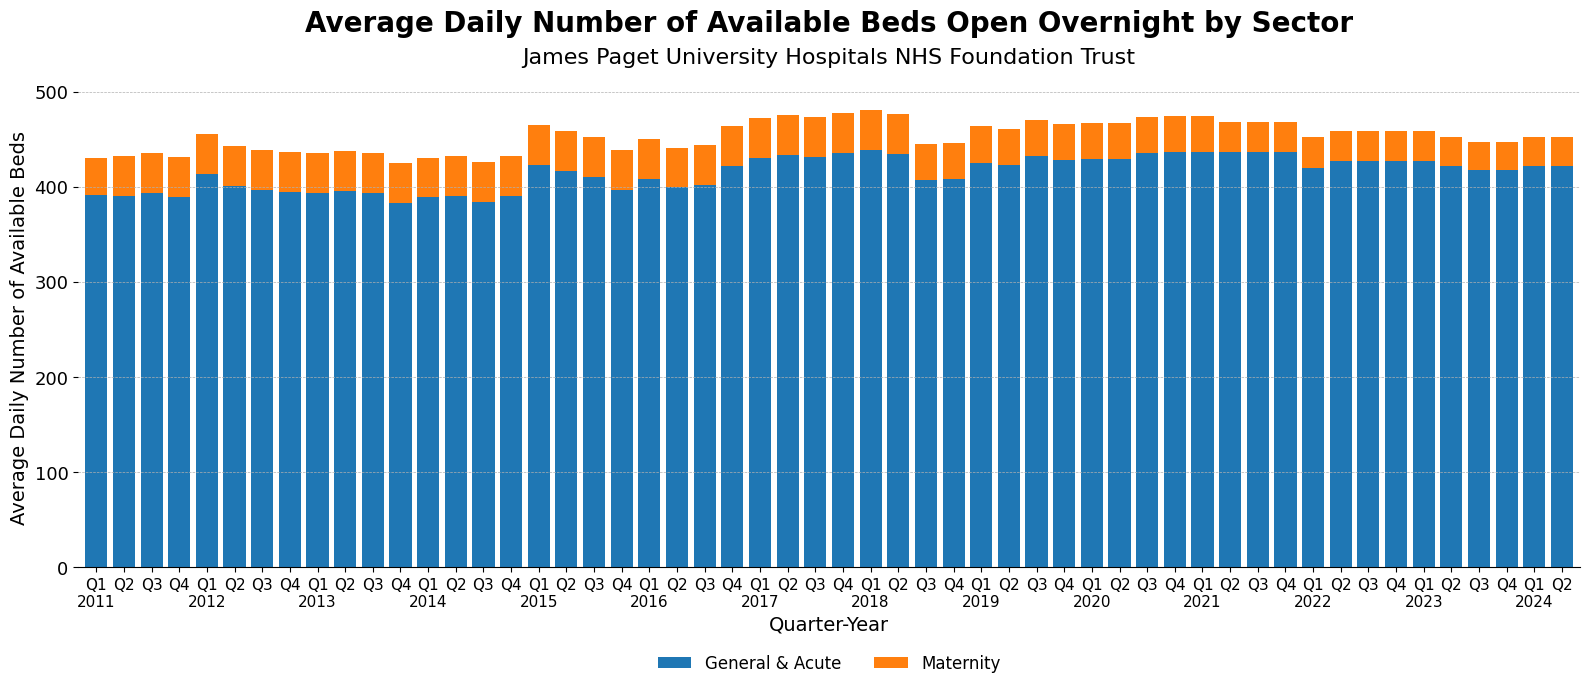

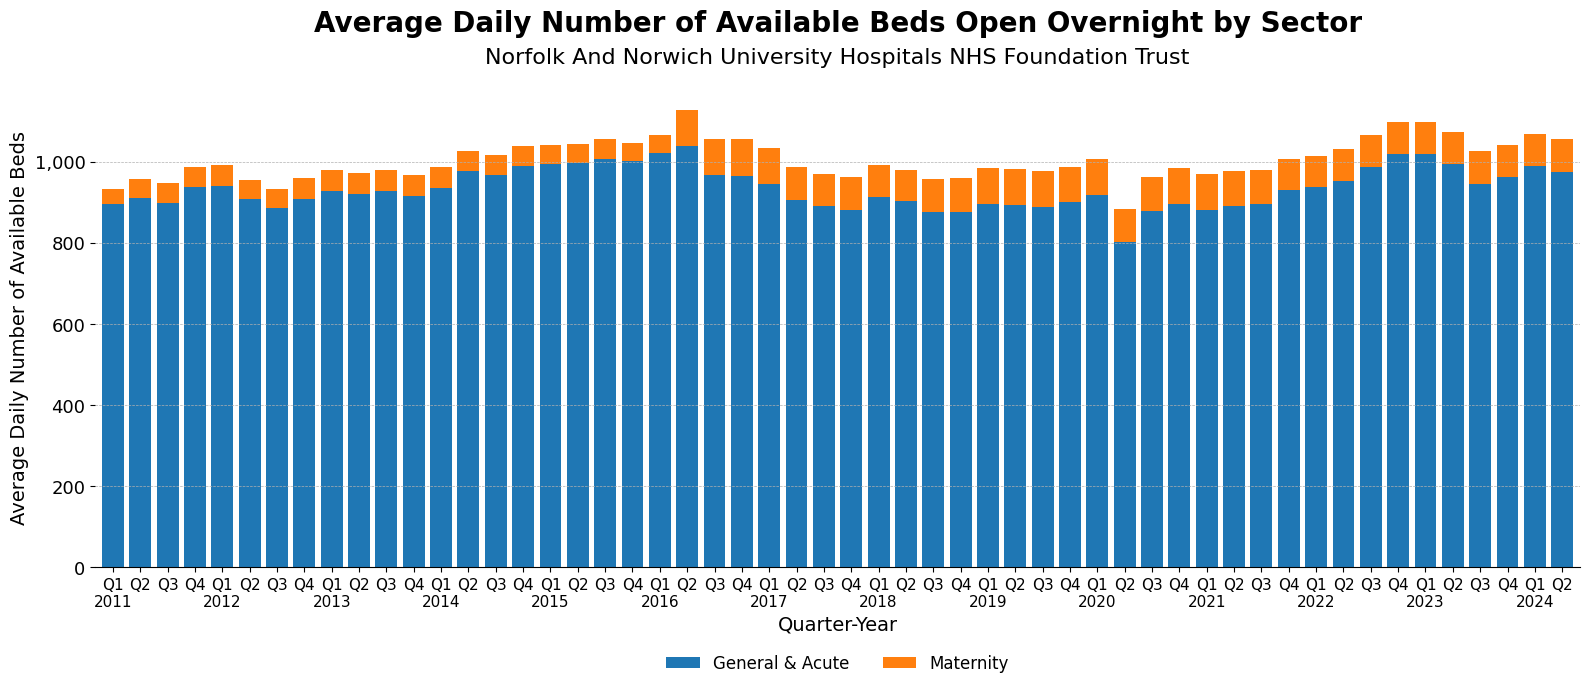

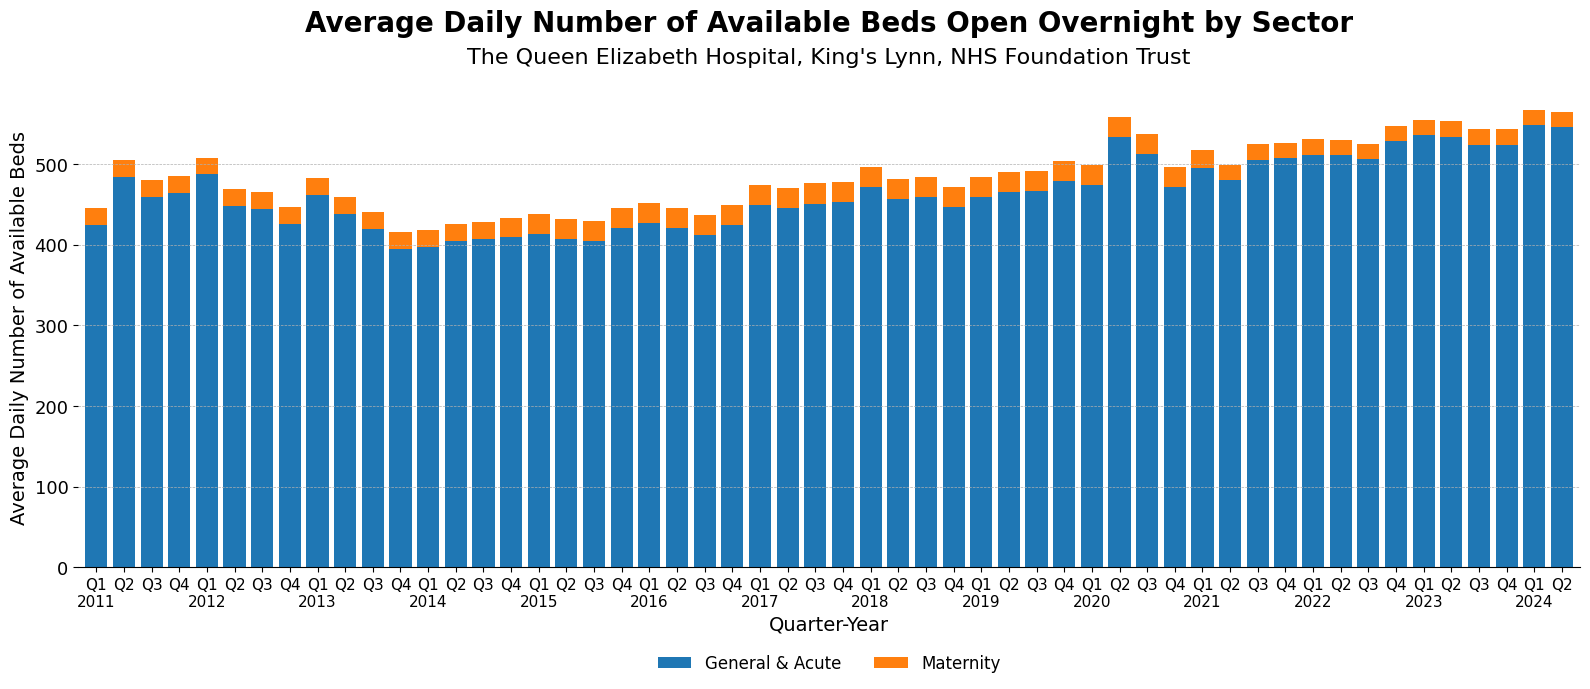

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# === Create a copy of the original df for plotting ===
df_plot = df.copy()
df_plot['Date'] = pd.to_datetime(df_plot['Date'], dayfirst=True)
df_plot['Number_Of_Beds_available'] = pd.to_numeric(df_plot['Number_Of_Beds_available'], errors='coerce')
df_plot['Quarter'] = df_plot['Date'].dt.to_period('Q')

# === Filter by hospital names, sector, and date ===
selected_orgs = [
    "James Paget University Hospitals NHS Foundation Trust",
    "Norfolk And Norwich University Hospitals NHS Foundation Trust",
    "The Queen Elizabeth Hospital, King's Lynn, NHS Foundation Trust"
]

df_filtered = df_plot[
    (df_plot['Org_Name'].isin(selected_orgs)) &
    (df_plot['Sector'].isin(['General & Acute', 'Maternity'])) &
    (df_plot['Quarter'] >= '2011Q1')  # Include Q1 2011 and after
]

# === Function to format x-axis labels: show year only under Q1 ===
def format_labels(quarters):
    return [f"Q{q.quarter}\n{q.year}" if q.quarter == 1 else f"Q{q.quarter}" for q in quarters]

# === Plot per trust with full formatting ===
for org in selected_orgs:
    df_org = df_filtered[df_filtered['Org_Name'] == org]
    df_grouped = df_org.groupby(['Quarter', 'Sector'])['Number_Of_Beds_available'].sum().unstack().fillna(0)
    x_labels = format_labels(df_grouped.index)

    # === Create figure ===
    fig, ax = plt.subplots(figsize=(16, 8))
    fig.patch.set_facecolor('white')

    # === Bar plot ===
    df_grouped.plot(kind='bar', stacked=True, ax=ax, width=0.8)

    # === Titles ===
    ax.set_title("Average Daily Number of Available Beds Open Overnight by Sector", fontsize=20, pad=40, weight='bold')
    ax.text(0.5, 1.05, f"{org}", fontsize=16, ha='center', transform=ax.transAxes)

    # === Axis labels ===
    ax.set_ylabel("Average Daily Number of Available Beds", fontsize=14)
    ax.set_xlabel("Quarter-Year", fontsize=14)

    # === Tick formatting ===
    ax.set_xticks(range(len(x_labels)))
    ax.set_xticklabels(x_labels, rotation=0, ha='center', fontsize=13)
    ax.tick_params(axis='x', labelsize=11)
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
    ax.tick_params(axis='y', labelsize=13)

    # === Grid and style ===
    ax.grid(axis='y', linestyle='--', linewidth=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # === Legend ===
    ax.legend(
        title="",
        fontsize=12,
        title_fontsize=13,
        loc='upper center',
        bbox_to_anchor=(0.5, -0.15),
        ncol=2,
        frameon=False
    )

    # === Layout and show ===
    plt.tight_layout(rect=[0, 0.1, 1, 1])
    
    # Uncomment to save
    plt.savefig(os.path.join(plot_save_path, f"Avg Daily Number of Available Overnight Beds{org}.png"), bbox_inches='tight', dpi=300)
    plt.show()


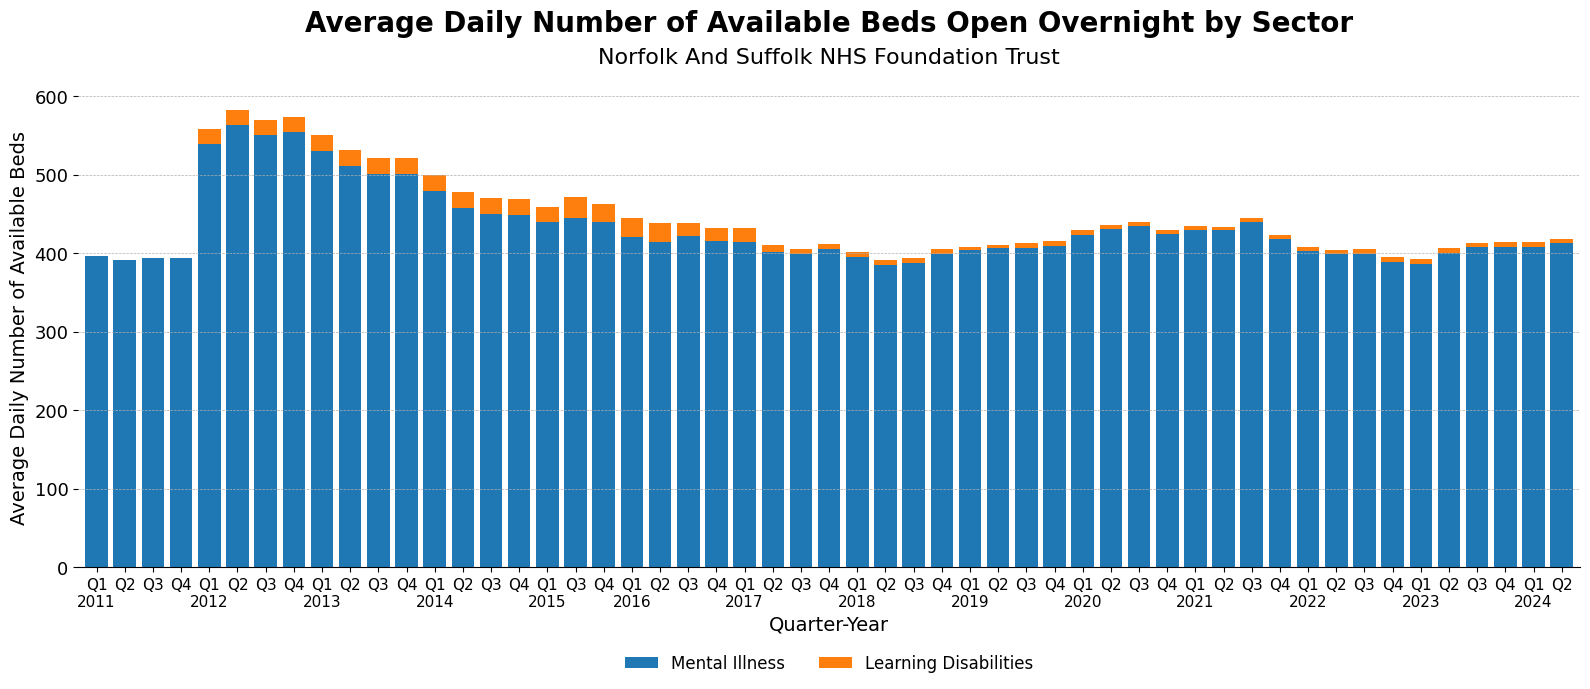

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

# === Create a copy of the original df for plotting ===
df_plot = df.copy()
df_plot['Date'] = pd.to_datetime(df_plot['Date'], dayfirst=True)
df_plot['Number_Of_Beds_available'] = pd.to_numeric(df_plot['Number_Of_Beds_available'], errors='coerce')
df_plot['Quarter'] = df_plot['Date'].dt.to_period('Q')

# === Filter by hospital names, sector, and date ===
selected_orgs = [
    "Norfolk And Suffolk NHS Foundation Trust",
]

df_filtered = df_plot[
    (df_plot['Org_Name'].isin(selected_orgs)) &
    (df_plot['Sector'].isin(['Learning Disabilities', 'Mental Illness'])) &
    (df_plot['Quarter'] >= '2011Q1')
]

# === Function to format x-axis labels: show year only under Q1 ===
def format_labels(quarters):
    return [f"Q{q.quarter}\n{q.year}" if q.quarter == 1 else f"Q{q.quarter}" for q in quarters]

# === Plot per trust with full formatting ===
for org in selected_orgs:
    df_org = df_filtered[df_filtered['Org_Name'] == org]
    df_grouped = df_org.groupby(['Quarter', 'Sector'])['Number_Of_Beds_available'].sum().unstack().fillna(0)

    # === Ensure desired stacking order: Mental Illness at bottom, Learning Disabilities on top ===
    df_grouped = df_grouped[['Mental Illness', 'Learning Disabilities']]

    x_labels = format_labels(df_grouped.index)

    # === Create figure ===
    fig, ax = plt.subplots(figsize=(16, 8))
    fig.patch.set_facecolor('white')

    # === Bar plot ===
    df_grouped.plot(kind='bar', stacked=True, ax=ax, width=0.8)

    # === Titles ===
    ax.set_title("Average Daily Number of Available Beds Open Overnight by Sector", fontsize=20, pad=40, weight='bold')
    ax.text(0.5, 1.05, f"{org}", fontsize=16, ha='center', transform=ax.transAxes)

    # === Axis labels ===
    ax.set_ylabel("Average Daily Number of Available Beds", fontsize=14)
    ax.set_xlabel("Quarter-Year", fontsize=14)

    # === Tick formatting ===
    ax.set_xticks(range(len(x_labels)))
    ax.set_xticklabels(x_labels, rotation=0, ha='center', fontsize=13)
    ax.tick_params(axis='x', labelsize=11)
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
    ax.tick_params(axis='y', labelsize=13)

    # === Grid and style ===
    ax.grid(axis='y', linestyle='--', linewidth=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # === Legend ===
    ax.legend(
        title="",
        fontsize=12,
        title_fontsize=13,
        loc='upper center',
        bbox_to_anchor=(0.5, -0.15),
        ncol=2,
        frameon=False
    )

    # === Layout and show ===
    plt.tight_layout(rect=[0, 0.1, 1, 1])

    # === Save plot ===
    plt.savefig(os.path.join(plot_save_path, f"Avg Daily Number of Available Overnight Beds{org}.png"), bbox_inches='tight', dpi=300)
    plt.show()


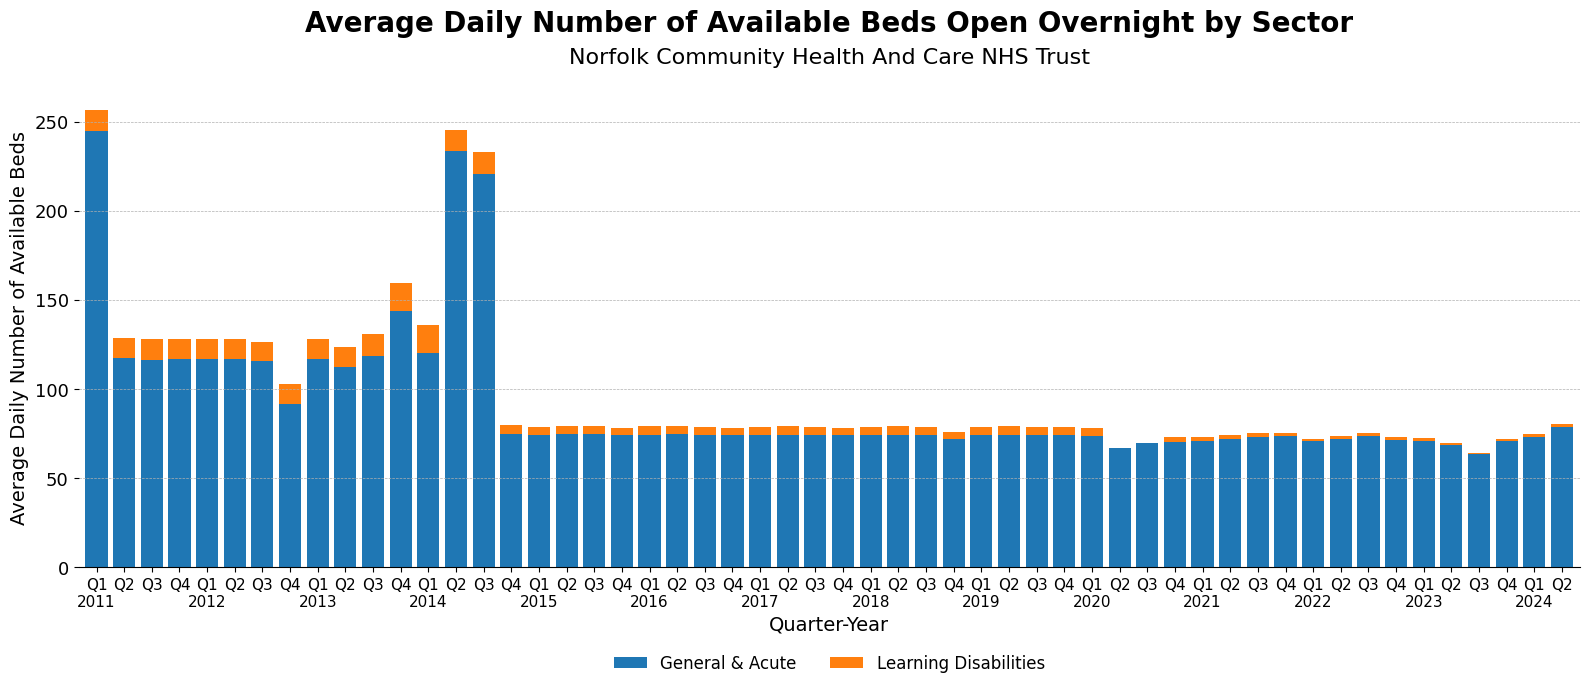

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

# === Create a copy of the original df for plotting ===
df_plot = df.copy()
df_plot['Date'] = pd.to_datetime(df_plot['Date'], dayfirst=True)
df_plot['Number_Of_Beds_available'] = pd.to_numeric(df_plot['Number_Of_Beds_available'], errors='coerce')
df_plot['Quarter'] = df_plot['Date'].dt.to_period('Q')

# === Filter by hospital names, sector, and date ===
selected_orgs = [
    "Norfolk Community Health And Care NHS Trust",
]

df_filtered = df_plot[
    (df_plot['Org_Name'].isin(selected_orgs)) &
    (df_plot['Sector'].isin(['General & Acute','Learning Disabilities'])) &
    (df_plot['Quarter'] >= '2011Q1')
]

# === Function to format x-axis labels: show year only under Q1 ===
def format_labels(quarters):
    return [f"Q{q.quarter}\n{q.year}" if q.quarter == 1 else f"Q{q.quarter}" for q in quarters]

# === Plot per trust with full formatting ===
for org in selected_orgs:
    df_org = df_filtered[df_filtered['Org_Name'] == org]
    df_grouped = df_org.groupby(['Quarter', 'Sector'])['Number_Of_Beds_available'].sum().unstack().fillna(0)

    # === Ensure desired stacking order: Mental Illness at bottom, Learning Disabilities on top ===
    df_grouped = df_grouped[['General & Acute', 'Learning Disabilities']]

    x_labels = format_labels(df_grouped.index)

    # === Create figure ===
    fig, ax = plt.subplots(figsize=(16, 8))
    fig.patch.set_facecolor('white')

    # === Bar plot ===
    df_grouped.plot(kind='bar', stacked=True, ax=ax, width=0.8)

    # === Titles ===
    ax.set_title("Average Daily Number of Available Beds Open Overnight by Sector", fontsize=20, pad=40, weight='bold')
    ax.text(0.5, 1.05, f"{org}", fontsize=16, ha='center', transform=ax.transAxes)

    # === Axis labels ===
    ax.set_ylabel("Average Daily Number of Available Beds", fontsize=14)
    ax.set_xlabel("Quarter-Year", fontsize=14)

    # === Tick formatting ===
    ax.set_xticks(range(len(x_labels)))
    ax.set_xticklabels(x_labels, rotation=0, ha='center', fontsize=13)
    ax.tick_params(axis='x', labelsize=11)
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
    ax.tick_params(axis='y', labelsize=13)

    # === Grid and style ===
    ax.grid(axis='y', linestyle='--', linewidth=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # === Legend ===
    ax.legend(
        title="",
        fontsize=12,
        title_fontsize=13,
        loc='upper center',
        bbox_to_anchor=(0.5, -0.15),
        ncol=2,
        frameon=False
    )

    # === Layout and show ===
    plt.tight_layout(rect=[0, 0.1, 1, 1])

    # === Save plot ===
    plt.savefig(os.path.join(plot_save_path, f"Avg Daily Number of Available Overnight Beds{org}.png"), bbox_inches='tight', dpi=300)
    plt.show()

/var/folders/4_/wj3d4rr14vb32p3pr2705k9mjbk4dm/T/ipykernel_12979/997233881.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  tab10 = get_cmap('tab10')


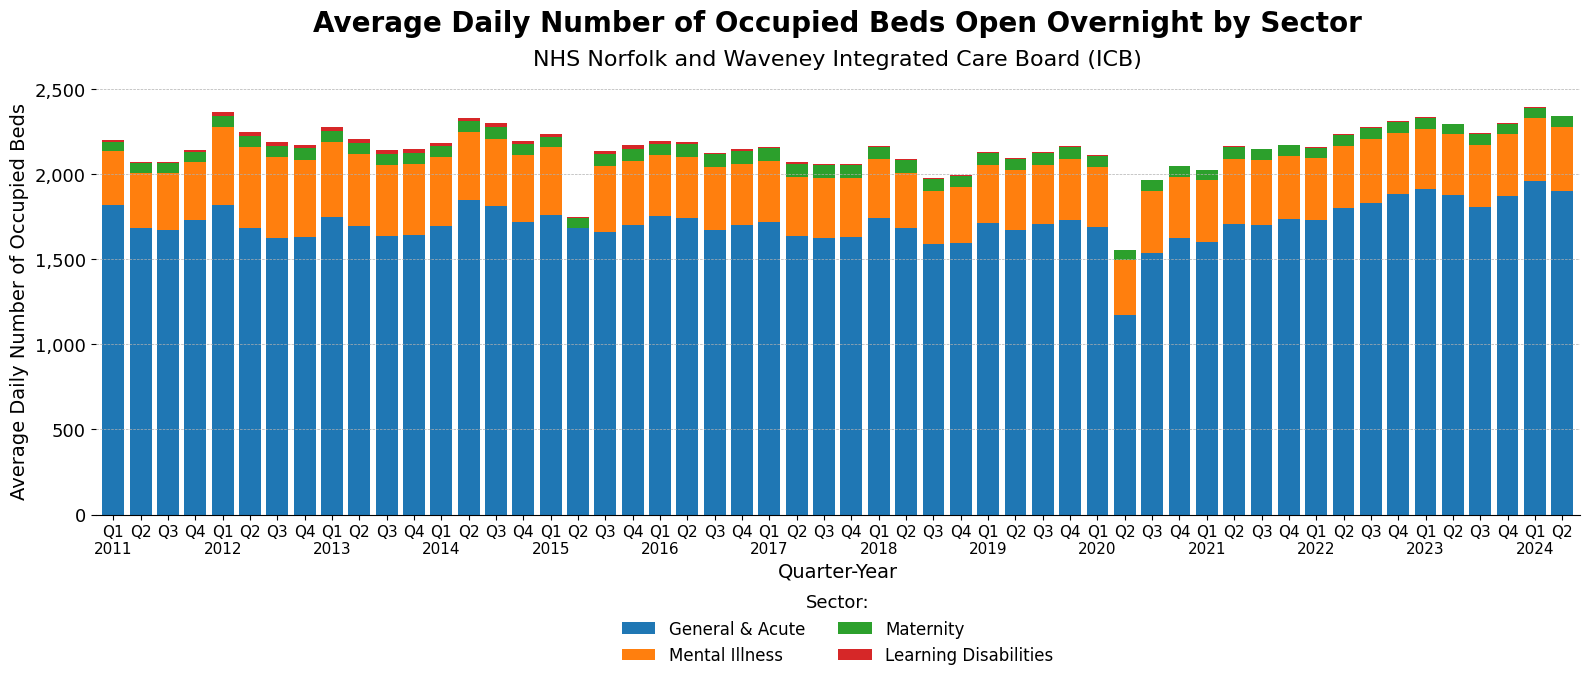

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.cm import get_cmap
import os

# === Create df_plot from df ===
df_plot = df.copy()

# === Clean and preprocess ===
df_plot['Date'] = pd.to_datetime(df_plot['Date'], dayfirst=True, errors='coerce')
df_plot['Number_Of_Beds_occupied'] = pd.to_numeric(df_plot['Number_Of_Beds_occupied'], errors='coerce')
df_plot['Quarter'] = df_plot['Date'].dt.to_period('Q')

# === Normalize sector names (e.g., "mental illness" -> "Mental Illness") ===
df_plot['Sector'] = df_plot['Sector'].str.strip().str.title()

# === Filter for Norfolk & Waveney ICB organizations ===
norfolk_orgs = [
    "James Paget University Hospitals NHS Foundation Trust",
    "Norfolk And Norwich University Hospitals NHS Foundation Trust",
    "Norfolk And Suffolk NHS Foundation Trust",
    "Norfolk Community Health And Care NHS Trust",
    "The Queen Elizabeth Hospital, King's Lynn, NHS Foundation Trust"
]
df_icb = df_plot[df_plot['Org_Name'].isin(norfolk_orgs)].copy()

# === Group by Quarter and Sector for occupied beds ===
df_grouped = (
    df_icb.groupby(['Quarter', 'Sector'])['Number_Of_Beds_occupied']
    .sum()
    .unstack()
    .fillna(0)
)

# === Filter for Q1 2011 onwards ===
df_grouped = df_grouped[df_grouped.index >= '2011Q1']

# === Sort sectors by total occupancy (largest on bottom in stack) ===
sorted_sectors = df_grouped.sum(axis=0).sort_values(ascending=False).index.tolist()
df_grouped = df_grouped[sorted_sectors]

# === Format x-axis labels (show year under Q1) ===
def format_labels(quarters):
    return [f"Q{q.quarter}\n{q.year}" if q.quarter == 1 else f"Q{q.quarter}" for q in quarters]

x_labels = format_labels(df_grouped.index)

# === Use Tab10 colors ===
tab10 = get_cmap('tab10')
colors = [tab10(i % 10) for i in range(len(sorted_sectors))]

# === Plot ===
fig, ax = plt.subplots(figsize=(16, 8))
fig.patch.set_facecolor('white')

df_grouped.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    width=0.8,
    color=colors
)

# === Titles and labels ===
ax.set_title("Average Daily Number of Occupied Beds Open Overnight by Sector",
             fontsize=20, pad=40, weight='bold')
ax.text(0.5, 1.05, "NHS Norfolk and Waveney Integrated Care Board (ICB)",
        fontsize=16, ha='center', transform=ax.transAxes)

ax.set_ylabel("Average Daily Number of Occupied Beds", fontsize=14)
ax.set_xlabel("Quarter-Year", fontsize=14)

# === Axis formatting ===
ax.set_xticks(range(len(x_labels)))
ax.set_xticklabels(x_labels, rotation=0, ha='center', fontsize=11)
ax.tick_params(axis='y', labelsize=13)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))

# === Style and legend ===
ax.grid(axis='y', linestyle='--', linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.legend(
    title="Sector:",
    fontsize=12,
    title_fontsize=13,
    loc='upper center',
    bbox_to_anchor=(0.5, -0.15),
    ncol=2,
    frameon=False
)

plt.tight_layout(rect=[0, 0.1, 1, 1])

plt.savefig(os.path.join(plot_save_path, f"Avg Daily Number of Occupied Overnight Beds_ICB.png"), bbox_inches='tight', dpi=300)
plt.show()






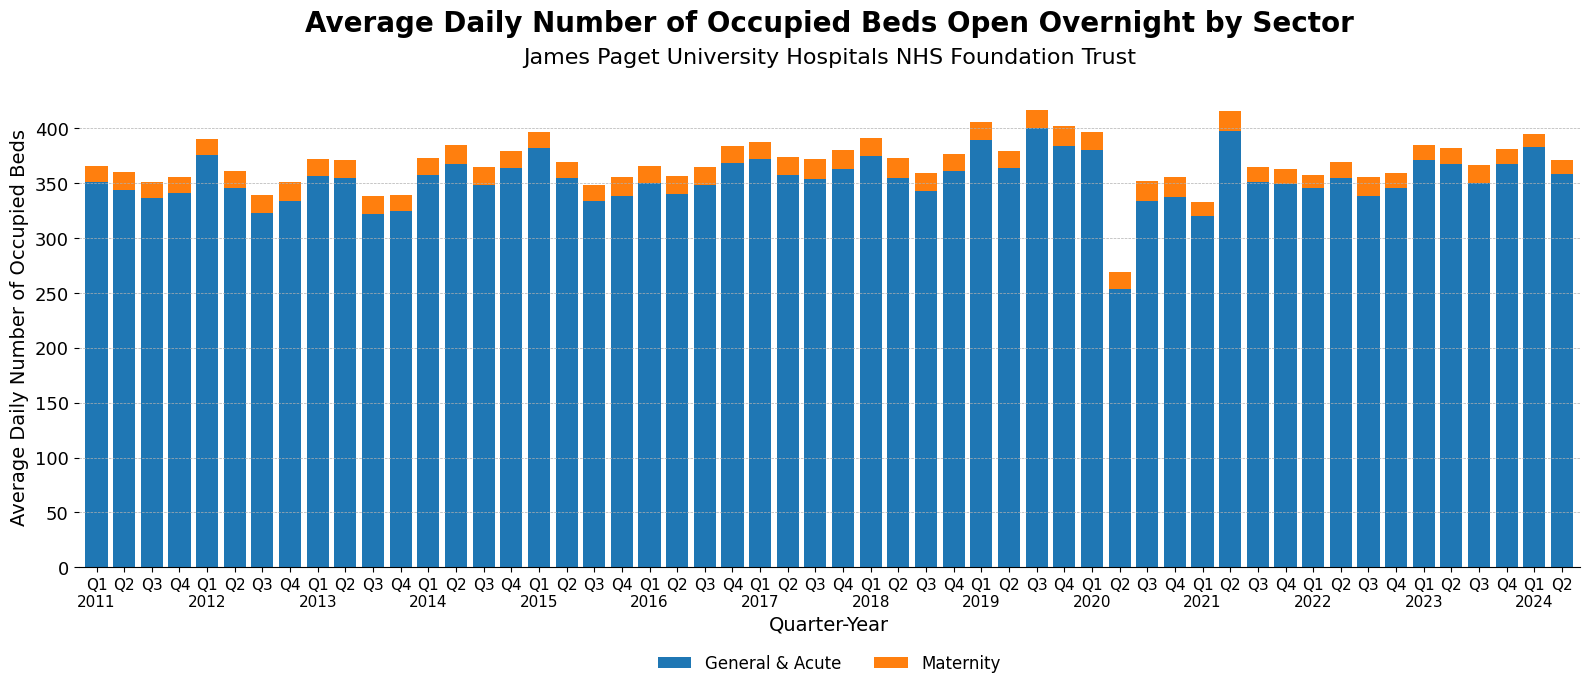

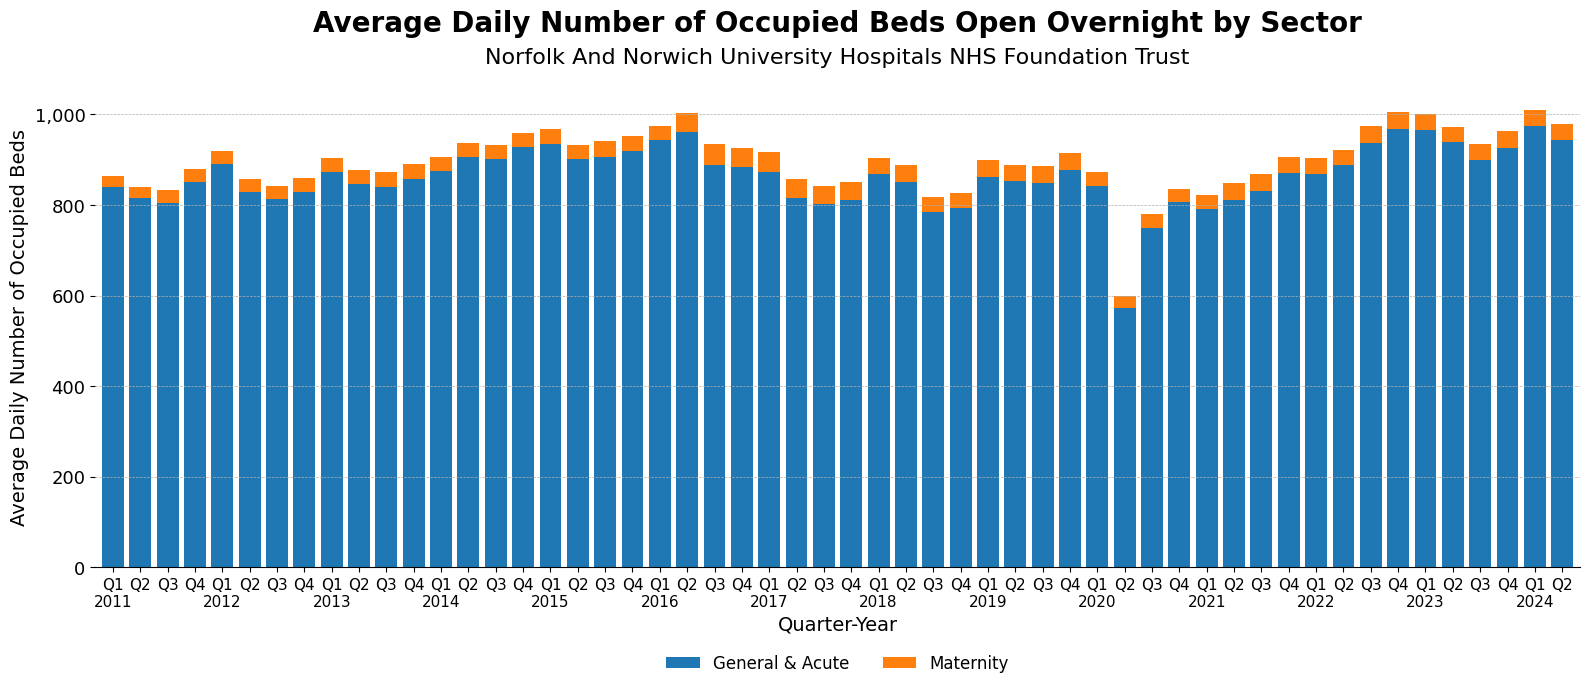

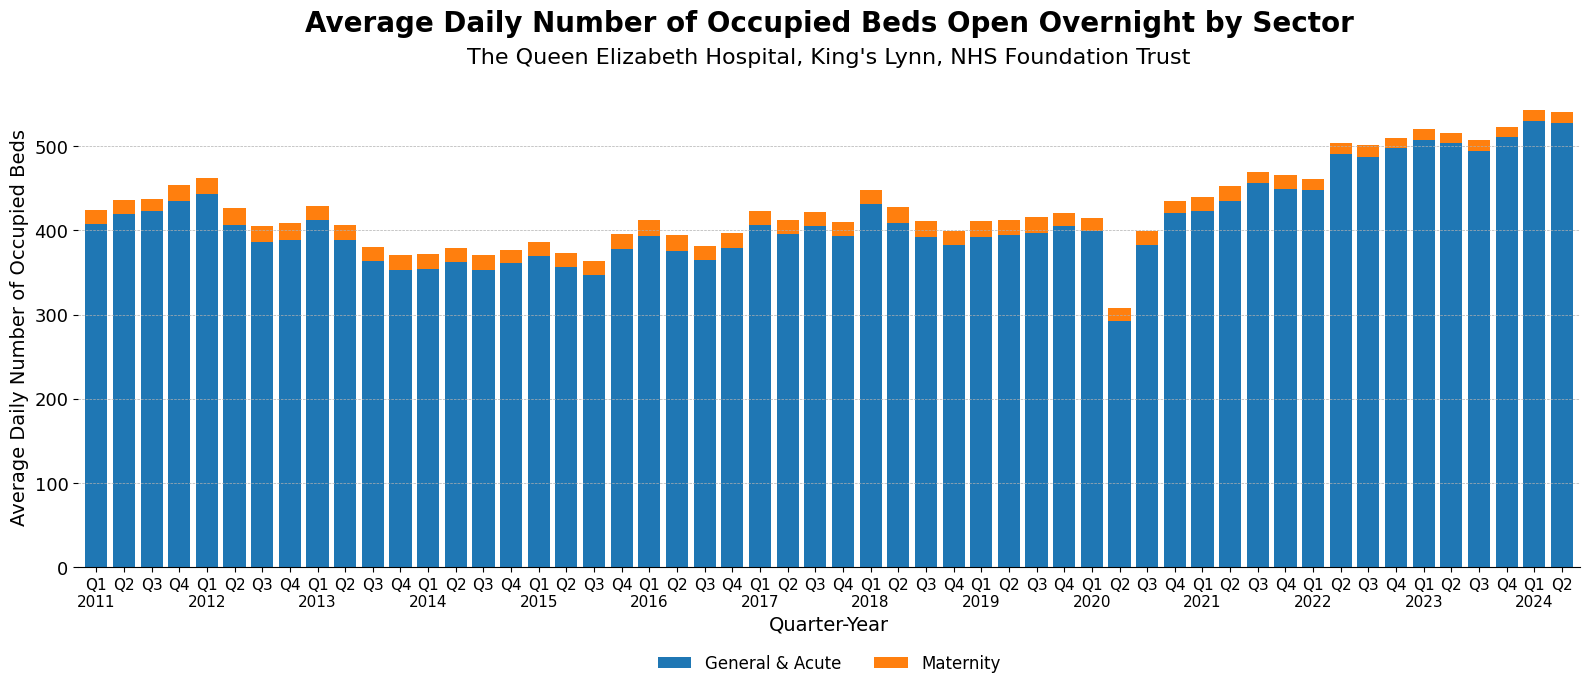

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# === Create a copy of the original df for plotting ===
df_plot = df.copy()
df_plot['Date'] = pd.to_datetime(df_plot['Date'], dayfirst=True)
df_plot['Number_Of_Beds_occupied'] = pd.to_numeric(df_plot['Number_Of_Beds_occupied'], errors='coerce')
df_plot['Quarter'] = df_plot['Date'].dt.to_period('Q')

# === Filter by hospital names, sector, and date ===
selected_orgs = [
    "James Paget University Hospitals NHS Foundation Trust",
    "Norfolk And Norwich University Hospitals NHS Foundation Trust",
    "The Queen Elizabeth Hospital, King's Lynn, NHS Foundation Trust"
]

df_filtered = df_plot[
    (df_plot['Org_Name'].isin(selected_orgs)) &
    (df_plot['Sector'].isin(['General & Acute', 'Maternity'])) &
    (df_plot['Quarter'] >= '2011Q1')  # Include Q1 2011 and after
]

# === Function to format x-axis labels: show year only under Q1 ===
def format_labels(quarters):
    return [f"Q{q.quarter}\n{q.year}" if q.quarter == 1 else f"Q{q.quarter}" for q in quarters]

# === Plot per trust with full formatting ===
for org in selected_orgs:
    df_org = df_filtered[df_filtered['Org_Name'] == org]
    df_grouped = df_org.groupby(['Quarter', 'Sector'])['Number_Of_Beds_occupied'].sum().unstack().fillna(0)
    x_labels = format_labels(df_grouped.index)

    # === Create figure ===
    fig, ax = plt.subplots(figsize=(16, 8))
    fig.patch.set_facecolor('white')

    # === Bar plot ===
    df_grouped.plot(kind='bar', stacked=True, ax=ax, width=0.8)

    # === Titles ===
    ax.set_title("Average Daily Number of Occupied Beds Open Overnight by Sector", fontsize=20, pad=40, weight='bold')
    ax.text(0.5, 1.05, f"{org}", fontsize=16, ha='center', transform=ax.transAxes)

    # === Axis labels ===
    ax.set_ylabel("Average Daily Number of Occupied Beds", fontsize=14)
    ax.set_xlabel("Quarter-Year", fontsize=14)

    # === Tick formatting ===
    ax.set_xticks(range(len(x_labels)))
    ax.set_xticklabels(x_labels, rotation=0, ha='center', fontsize=13)
    ax.tick_params(axis='x', labelsize=11)
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
    ax.tick_params(axis='y', labelsize=13)

    # === Grid and style ===
    ax.grid(axis='y', linestyle='--', linewidth=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # === Legend ===
    ax.legend(
        title="",
        fontsize=12,
        title_fontsize=13,
        loc='upper center',
        bbox_to_anchor=(0.5, -0.15),
        ncol=2,
        frameon=False
    )

    # === Layout and show ===
    plt.tight_layout(rect=[0, 0.1, 1, 1])
    
    # Uncomment to save
    plt.savefig(os.path.join(plot_save_path, f"Avg Daily Number of Occupied Overnight Beds{org}.png"), bbox_inches='tight', dpi=300)
    plt.show()

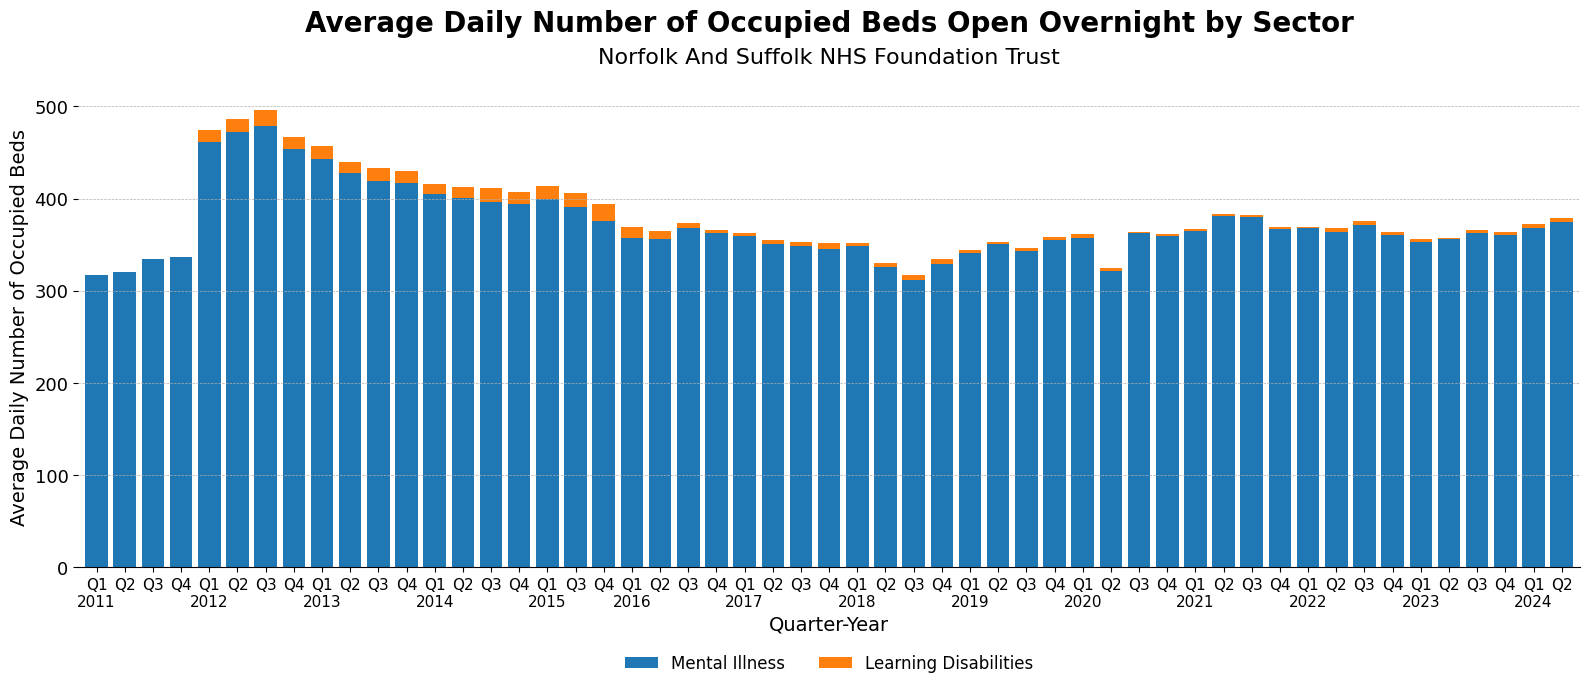

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

# === Create a copy of the original df for plotting ===
df_plot = df.copy()
df_plot['Date'] = pd.to_datetime(df_plot['Date'], dayfirst=True)
df_plot['Number_Of_Beds_occupied'] = pd.to_numeric(df_plot['Number_Of_Beds_occupied'], errors='coerce')
df_plot['Quarter'] = df_plot['Date'].dt.to_period('Q')

# === Filter by hospital names, sector, and date ===
selected_orgs = [
    "Norfolk And Suffolk NHS Foundation Trust",
]

df_filtered = df_plot[
    (df_plot['Org_Name'].isin(selected_orgs)) &
    (df_plot['Sector'].isin(['Learning Disabilities', 'Mental Illness'])) &
    (df_plot['Quarter'] >= '2011Q1')
]

# === Function to format x-axis labels: show year only under Q1 ===
def format_labels(quarters):
    return [f"Q{q.quarter}\n{q.year}" if q.quarter == 1 else f"Q{q.quarter}" for q in quarters]

# === Plot per trust with full formatting ===
for org in selected_orgs:
    df_org = df_filtered[df_filtered['Org_Name'] == org]
    df_grouped = df_org.groupby(['Quarter', 'Sector'])['Number_Of_Beds_occupied'].sum().unstack().fillna(0)

    # === Ensure desired stacking order: Mental Illness at bottom, Learning Disabilities on top ===
    df_grouped = df_grouped[['Mental Illness', 'Learning Disabilities']]

    x_labels = format_labels(df_grouped.index)

    # === Create figure ===
    fig, ax = plt.subplots(figsize=(16, 8))
    fig.patch.set_facecolor('white')

    # === Bar plot ===
    df_grouped.plot(kind='bar', stacked=True, ax=ax, width=0.8)

    # === Titles ===
    ax.set_title("Average Daily Number of Occupied Beds Open Overnight by Sector", fontsize=20, pad=40, weight='bold')
    ax.text(0.5, 1.05, f"{org}", fontsize=16, ha='center', transform=ax.transAxes)

    # === Axis labels ===Average Daily Number of Occupied Beds
    ax.set_ylabel("", fontsize=14)
    ax.set_xlabel("Quarter-Year", fontsize=14)

    # === Tick formatting ===
    ax.set_xticks(range(len(x_labels)))
    ax.set_xticklabels(x_labels, rotation=0, ha='center', fontsize=13)
    ax.tick_params(axis='x', labelsize=11)
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
    ax.tick_params(axis='y', labelsize=13)

    # === Grid and style ===
    ax.grid(axis='y', linestyle='--', linewidth=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # === Legend ===
    ax.legend(
        title="",
        fontsize=12,
        title_fontsize=13,
        loc='upper center',
        bbox_to_anchor=(0.5, -0.15),
        ncol=2,
        frameon=False
    )

    # === Layout and show ===
    plt.tight_layout(rect=[0, 0.1, 1, 1])

    # === Save plot ===
    plt.savefig(os.path.join(plot_save_path, f"Avg Daily Number of Occupied Overnight Beds{org}.png"), bbox_inches='tight', dpi=300)
    plt.show()

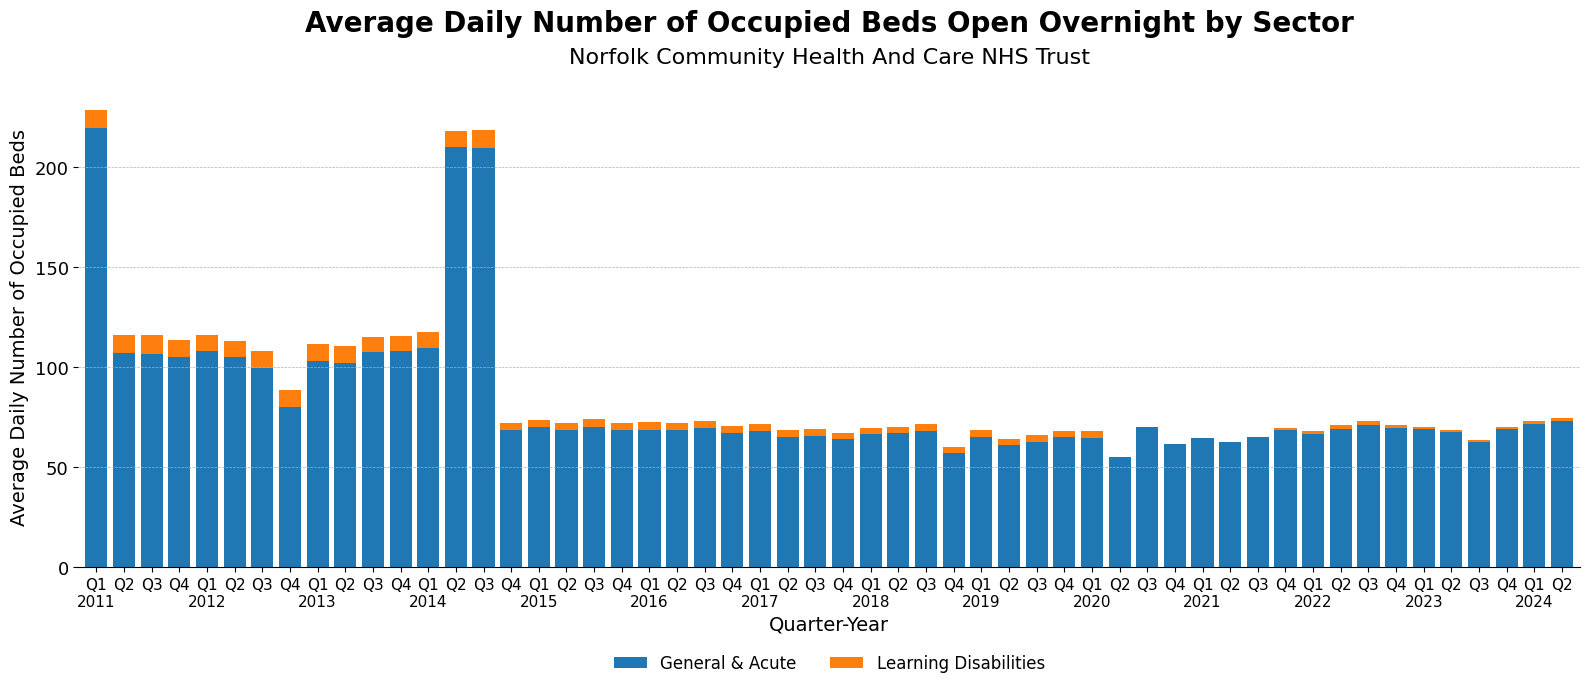

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

# === Create a copy of the original df for plotting ===
df_plot = df.copy()
df_plot['Date'] = pd.to_datetime(df_plot['Date'], dayfirst=True)
df_plot['Number_Of_Beds_occupied'] = pd.to_numeric(df_plot['Number_Of_Beds_occupied'], errors='coerce')
df_plot['Quarter'] = df_plot['Date'].dt.to_period('Q')

# === Filter by hospital names, sector, and date ===
selected_orgs = [
    "Norfolk Community Health And Care NHS Trust",
]

df_filtered = df_plot[
    (df_plot['Org_Name'].isin(selected_orgs)) &
    (df_plot['Sector'].isin(['General & Acute','Learning Disabilities'])) &
    (df_plot['Quarter'] >= '2011Q1')
]

# === Function to format x-axis labels: show year only under Q1 ===
def format_labels(quarters):
    return [f"Q{q.quarter}\n{q.year}" if q.quarter == 1 else f"Q{q.quarter}" for q in quarters]

# === Plot per trust with full formatting ===
for org in selected_orgs:
    df_org = df_filtered[df_filtered['Org_Name'] == org]
    df_grouped = df_org.groupby(['Quarter', 'Sector'])['Number_Of_Beds_occupied'].sum().unstack().fillna(0)

    # === Ensure desired stacking order: Mental Illness at bottom, Learning Disabilities on top ===
    df_grouped = df_grouped[['General & Acute', 'Learning Disabilities']]

    x_labels = format_labels(df_grouped.index)

    # === Create figure ===
    fig, ax = plt.subplots(figsize=(16, 8))
    fig.patch.set_facecolor('white')

    # === Bar plot ===
    df_grouped.plot(kind='bar', stacked=True, ax=ax, width=0.8)

    # === Titles ===
    ax.set_title("Average Daily Number of Occupied Beds Open Overnight by Sector", fontsize=20, pad=40, weight='bold')
    ax.text(0.5, 1.05, f"{org}", fontsize=16, ha='center', transform=ax.transAxes)

    # === Axis labels ===
    ax.set_ylabel("Average Daily Number of Occupied Beds", fontsize=14)
    ax.set_xlabel("Quarter-Year", fontsize=14)

    # === Tick formatting ===
    ax.set_xticks(range(len(x_labels)))
    ax.set_xticklabels(x_labels, rotation=0, ha='center', fontsize=13)
    ax.tick_params(axis='x', labelsize=11)
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x):,}"))
    ax.tick_params(axis='y', labelsize=13)

    # === Grid and style ===
    ax.grid(axis='y', linestyle='--', linewidth=0.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # === Legend ===
    ax.legend(
        title="",
        fontsize=12,
        title_fontsize=13,
        loc='upper center',
        bbox_to_anchor=(0.5, -0.15),
        ncol=2,
        frameon=False
    )

    # === Layout and show ===
    plt.tight_layout(rect=[0, 0.1, 1, 1])

    # === Save plot ===
    plt.savefig(os.path.join(plot_save_path, f"Avg Daily Number of Occupied Overnight Beds{org}.png"), bbox_inches='tight', dpi=300)
    plt.show()

C:\Users\e410675\AppData\Local\Temp\ipykernel_24648\2253277022.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  tab10 = get_cmap('tab10')


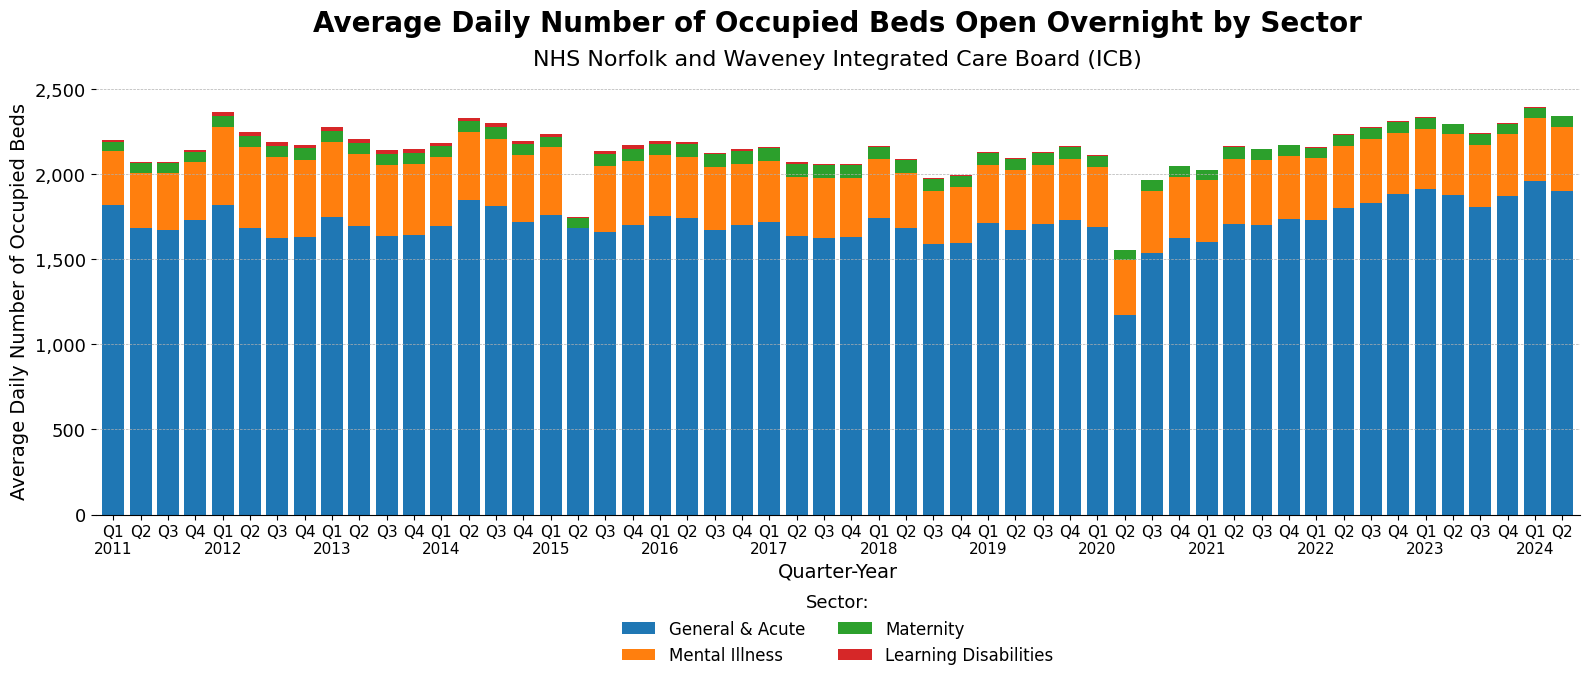

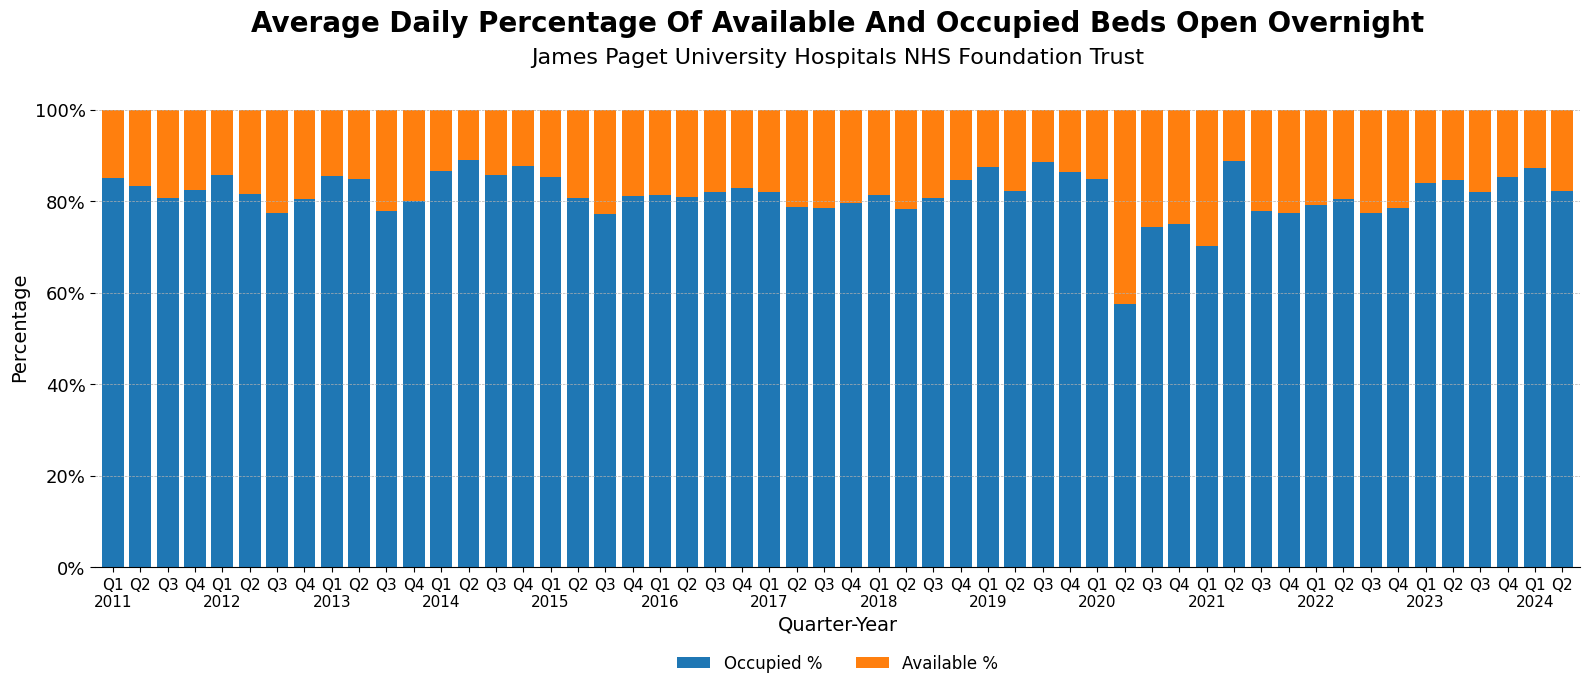

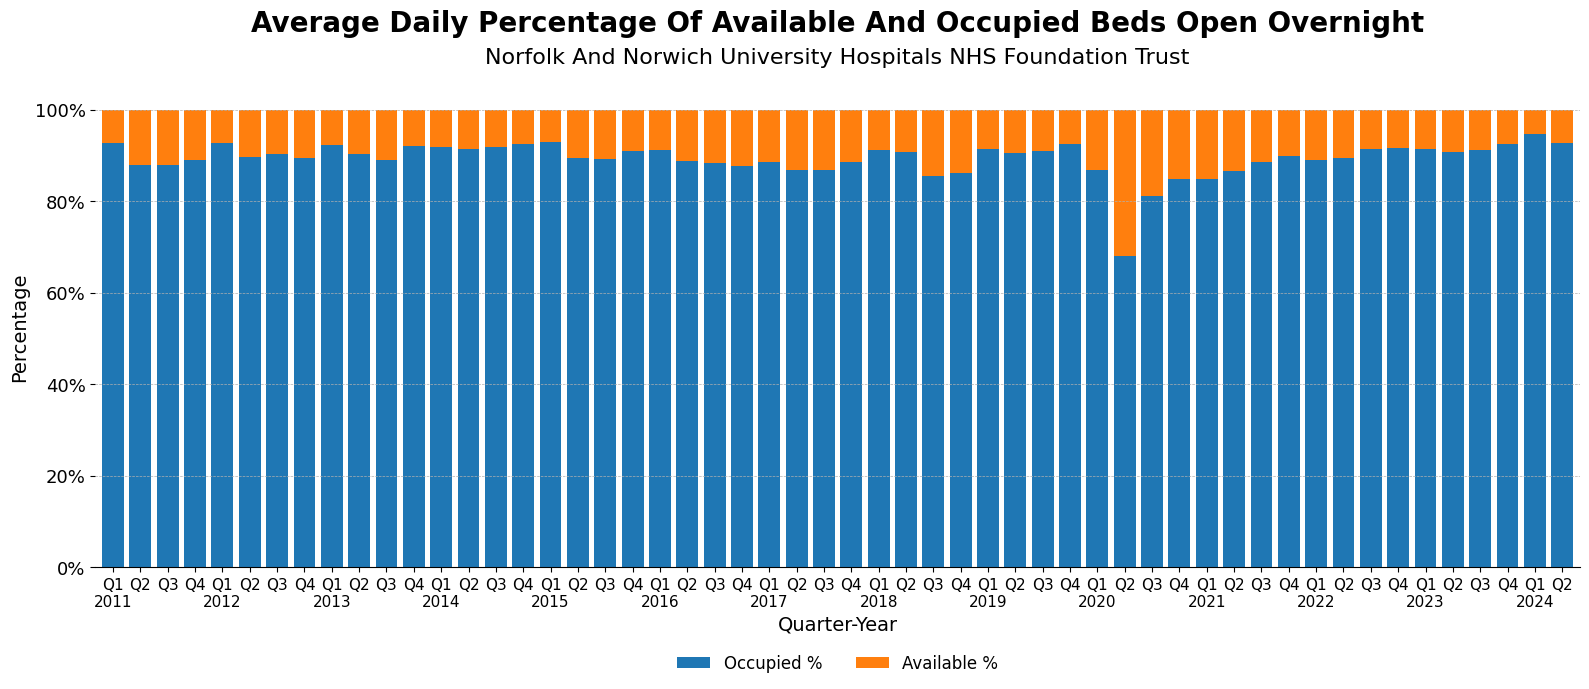

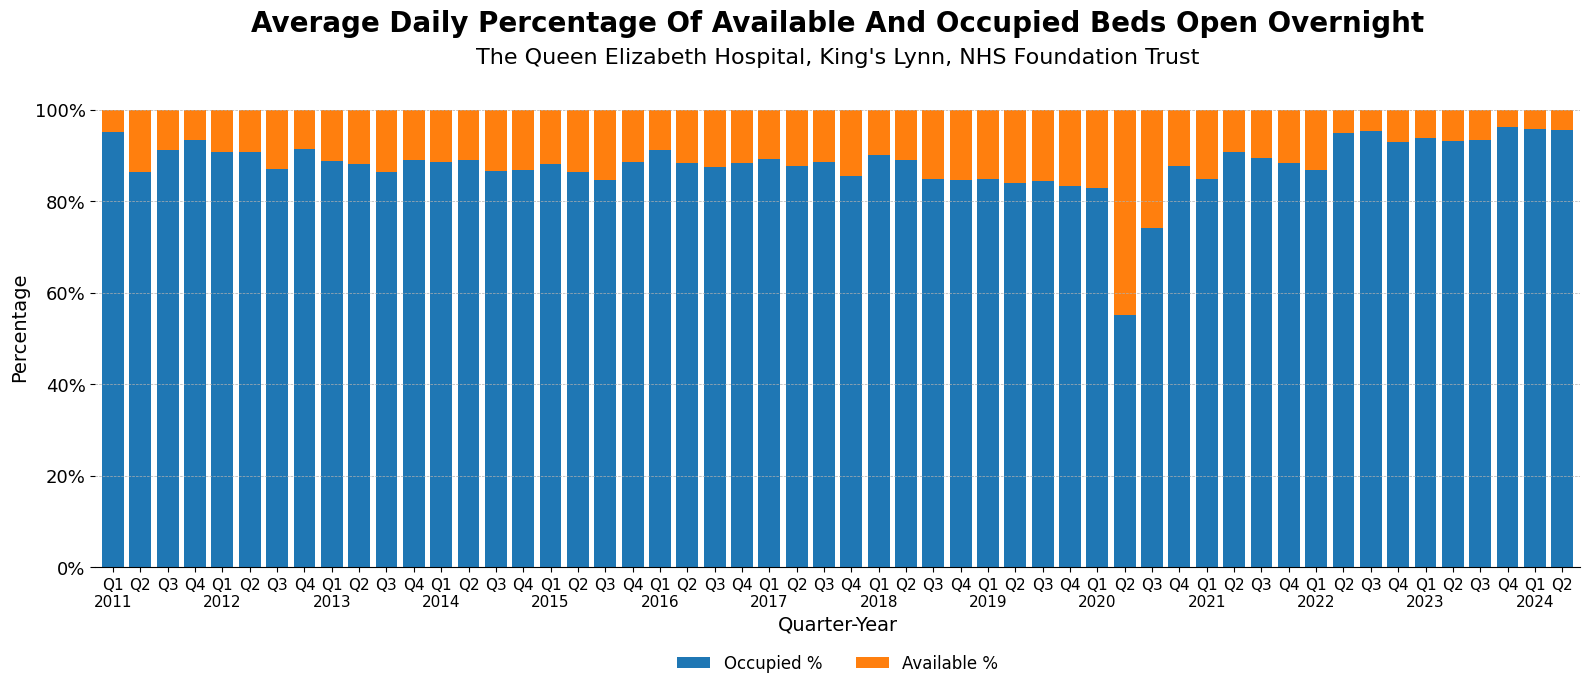

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# === Create a copy for plotting ===
df_plot = df.copy()
df_plot['Date'] = pd.to_datetime(df_plot['Date'], dayfirst=True)
df_plot['Number_Of_Beds_available'] = pd.to_numeric(df_plot['Number_Of_Beds_available'], errors='coerce')
df_plot['Number_Of_Beds_occupied'] = pd.to_numeric(df_plot['Number_Of_Beds_occupied'], errors='coerce')
df_plot['Quarter'] = df_plot['Date'].dt.to_period('Q')

# === Select trusts ===
selected_orgs = [
    "James Paget University Hospitals NHS Foundation Trust",
    "Norfolk And Norwich University Hospitals NHS Foundation Trust",
    "The Queen Elizabeth Hospital, King's Lynn, NHS Foundation Trust"
    
]

# === Filter data ===
df_filtered = df_plot[
    (df_plot['Org_Name'].isin(selected_orgs)) &
    (df_plot['Sector'].isin(['General & Acute', 'Maternity'])) &
    (df_plot['Quarter'] >= '2011Q1')
].copy()

# === Group and compute percentages ===
results = []
for org in selected_orgs:
    df_org = df_filtered[df_filtered['Org_Name'] == org]
    df_grouped = df_org.groupby('Quarter')[['Number_Of_Beds_available', 'Number_Of_Beds_occupied']].sum()
    df_grouped['Occupied %'] = (df_grouped['Number_Of_Beds_occupied'] / df_grouped['Number_Of_Beds_available']) * 100
    df_grouped['Available %'] = 100 - df_grouped['Occupied %']
    results.append((org, df_grouped[['Occupied %', 'Available %']]))

# === Label formatter ===
def format_labels(quarters):
    return [f"Q{q.quarter}\n{q.year}" if q.quarter == 1 else f"Q{q.quarter}" for q in quarters]

# === Get Tab10 colors ===
colors = plt.get_cmap("tab10").colors

# === Plot each trust ===
for org, df_grouped in results:
    x_labels = format_labels(df_grouped.index)

    fig, ax = plt.subplots(figsize=(16, 8))
    fig.patch.set_facecolor('white')

    df_grouped.plot(
        kind='bar',
        stacked=True,
        ax=ax,
        width=0.8,
        color=[colors[0], colors[1]]  # Tab10 colors
    )

    ax.set_title("Average Daily Percentage Of Available And Occupied Beds Open Overnight", fontsize=20, pad=40, weight='bold')
    ax.text(0.5, 1.05, f"{org}", fontsize=16, ha='center', transform=ax.transAxes)

    ax.set_ylabel("Percentage", fontsize=14)
    ax.set_xlabel("Quarter-Year", fontsize=14)
    ax.set_xticks(range(len(x_labels)))
    ax.set_xticklabels(x_labels, rotation=0, ha='center', fontsize=13)
    ax.tick_params(axis='x', labelsize=11)
    ax.yaxis.set_major_formatter(ticker.PercentFormatter())
    ax.tick_params(axis='y', labelsize=13)

    ax.grid(axis='y', linestyle='--', linewidth=0.5)

    # === Remove spines ===
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)  # Hides the vertical y-axis line

    ax.legend(
        labels=["Occupied %", "Available %"],
        title="",
        fontsize=12,
        title_fontsize=13,
        loc='upper center',
        bbox_to_anchor=(0.5, -0.15),
        ncol=2,
        frameon=False
    )

    plt.tight_layout(rect=[0, 0.1, 1, 1])
    plt.savefig(os.path.join(plot_save_path, f"A_Avg Daily Percentage of Available and Occupied Overnight Beds{org}.png"), bbox_inches='tight', dpi=300)
    plt.show()
